# Solar Irradiance EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Data Merging and Preprocessing is done in file (Data Collection and Merging.ipynb)
Output of file is written to: SolarIrradiance - processed.csv

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# File path to the Solar Irradiance processed data stored in Google Drive
file_path = '/content/drive/Shareddrives/DATA245_Project/SolarIrradiance_processed.csv'

In [ ]:
# Reading the Solar Irradiance processed data from the specified file path into a pandas DataFrame
solar_ir_df = pd.read_csv(file_path)

### Summary statistics of solar data (shape, columns, describe, missing values null values etc)

In [ ]:
# Displaying the rows and columns of the data
solar_ir_df.shape

(1314720, 21)

In [ ]:
#checking all the features or columns of the data
solar_ir_df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'GHI', 'Relative Humidity', 'Solar Zenith Angle', 'Pressure',
       'Precipitable Water', 'Wind Speed', 'zipcode', 'hour_day_part'],
      dtype='object')

In [ ]:
# Summary statistics of the data
solar_ir_df.describe()

Year         Month           Day          Hour     Minute  \
count  1.314720e+06  1.314720e+06  1.314720e+06  1.314720e+06  1314720.0   
mean   2.020000e+03  6.523549e+00  1.572782e+01  1.150000e+01       30.0   
std    1.413827e+00  3.448534e+00  8.799328e+00  6.922189e+00        0.0   
min    2.018000e+03  1.000000e+00  1.000000e+00  0.000000e+00       30.0   
25%    2.019000e+03  4.000000e+00  8.000000e+00  5.750000e+00       30.0   
50%    2.020000e+03  7.000000e+00  1.600000e+01  1.150000e+01       30.0   
75%    2.021000e+03  1.000000e+01  2.300000e+01  1.725000e+01       30.0   
max    2.022000e+03  1.200000e+01  3.100000e+01  2.300000e+01       30.0   

        Temperature  Clearsky DHI  Clearsky DNI  Clearsky GHI    Cloud Type  \
count  1.314720e+06  1.314720e+06  1.314720e+06  1.314720e+06  1.314720e+06   
mean   1.569358e+01  4.366212e+01  3.581658e+02  2.483008e+02  1.533958e+00   
std    6.715500e+00  5.266085e+01  3.912259e+02  3.228307e+02  2.725400e+00   
min   -2.800000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.090000e+01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    1.440000e+01  1.000000e+01  6.100000e+01  1.100000e+01  0.000000e+00   
75%    1.930000e+01  8.400000e+01  8.010000e+02  4.960000e+02  3.000000e+00   
max    4.620000e+01  4.380000e+02  1.023000e+03  1.053000e+03  9.000000e+00   

          Dew Point           DHI           DNI           GHI  \
count  1.314720e+06  1.314720e+06  1.314720e+06  1.314720e+06   
mean   8.382243e+00  5.261429e+01  2.918992e+02  2.241401e+02   
std    3.899133e+00  7.183775e+01  3.681441e+02  3.088930e+02   
min   -1.820000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.300000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    9.000000e+00  7.000000e+00  0.000000e+00  8.000000e+00   
75%    1.110000e+01  9.100000e+01  6.880000e+02  4.310000e+02   
max    2.040000e+01  5.130000e+02  1.023000e+03  1.053000e+03   

       Relative Humidity  Solar Zenith Angle      Pressure  \
count       1.314720e+06        1.314720e+06  1.314720e+06   
mean        6.802095e+01        8.968456e+01  1.014349e+03   
std         2.424006e+01        3.748750e+01  1.045495e+01   
min         4.770000e+00        1.444000e+01  9.590000e+02   
25%         4.916000e+01        6.008000e+01  1.012000e+03   
50%         7.340000e+01        8.909000e+01  1.017000e+03   
75%         8.885000e+01        1.197800e+02  1.020000e+03   
max         1.000000e+02        1.653700e+02  1.040000e+03   

       Precipitable Water    Wind Speed       zipcode  
count        1.314720e+06  1.314720e+06  1.314720e+06  
mean         1.553625e+00  1.924700e+00  9.512833e+04  
std          6.718073e-01  1.015036e+00  1.508937e+01  
min          2.000000e-01  1.000000e-01  9.511000e+04  
25%          1.100000e+00  1.100000e+00  9.511900e+04  
50%          1.400000e+00  1.600000e+00  9.512650e+04  
75%          1.900000e+00  2.600000e+00  9.513400e+04  
max          5.000000e+00  8.800000e+00  9.519200e+04

Variable creation Day part

Year: The year of the observation.

Month: The month of the observation.

Day: The day of the observation.

Hour: The hour of the observation.

Minute: The minute of the observation.

Temperature: The temperature measured in Celsius.

Clearsky DHI: Direct Horizontal Irradiance under clear skies.

Clearsky DNI: Direct Normal Irradiance under clear skies.

Clearsky GHI: Global Horizontal Irradiance under clear skies.

Cloud Type: Type of cloud present.

Dew Point: The temperature at which air becomes saturated and dew forms.

DHI: Direct Horizontal Irradiance.

DNI: Direct Normal Irradiance.

GHI: Global Horizontal Irradiance.

Relative Humidity: The amount of moisture in the air relative to the maximum amount of moisture the air can hold at that temperature.

Solar Zenith Angle: The angle between the sun and the zenith.

Pressure: Atmospheric pressure.

Precipitable Water: The depth of liquid water that would result if all the water vapor in the atmosphere above a given location were condensed and deposited on the surface.

Wind Speed: The speed of the wind.

zipcode: The postal code of the location.

hour_day_part: The part of the day (e.g., morning, afternoon, evening).

### We have filteried the data for only top 10 zip code in San Jose City

In [ ]:
# Counting the number of rows by zipcode
zipcode_counts = solar_ir_df.groupby('zipcode').size()

In [ ]:
# The specified zip codes account for >50% of San Jose population
san_jose_zipcodes_filter = [95123,95127,95111,95122,95125,95116,95112,95124,95148,95136]

# Filtering the data for the top 10 zipcodes
solar_ir_df_zip_filter = solar_ir_df[solar_ir_df['zipcode'].isin(san_jose_zipcodes_filter)]

# Filtering data for 2020-2022
solar_ir_df_zip_filter_year = solar_ir_df_zip_filter[solar_ir_df_zip_filter['Year'] >= 2020]

In [ ]:
# Function to count missing values (including NA, NaNs, and 0)
def count_missing(df):
    missing_counts = df.isna().sum()  # Count missing values (NaN)
    missing_counts = missing_counts.add(df.eq(0).sum(), axis=0)  # Count zeros
    return missing_counts

# Printing the counts of missing values
missing_value_counts = count_missing(solar_ir_df_zip_filter_year.copy())
print(missing_value_counts)

Year                       0
Month                      0
Day                        0
Hour                   10960
Minute                     0
Temperature                1
Clearsky DHI          126963
Clearsky DNI          126938
Clearsky GHI          126963
Cloud Type            202336
Dew Point                306
DHI                   126999
DNI                   130777
GHI                   126999
Relative Humidity          0
Solar Zenith Angle         0
Pressure                   0
Precipitable Water         0
Wind Speed                 0
zipcode                    0
hour_day_part              0
dtype: int64


### There are a lot of zeros in DHI, DNI, GHI, clearsky DHI, Clearsky DNI and clearsky GHI columns because there is no irradiance during the night time

## We have filtered the data on hour_day_part for zero as early_night,late_night and late_night_start_of_day can have multiple 0s

### Night-time filtering - since irradiance is 0 during night/dark hours, we can filter out parts of the day when GHI is most

In [ ]:
# Tabular summary by hour part
# Grouping by 'hour_day_part' and counting rows and the count of zeros in 'GHI'
solar_ir_df_zip_agg = solar_ir_df_zip_filter_year.groupby('hour_day_part')['GHI'].agg([
    ('Row count', 'count'),
    ('Count_of_Zeros', lambda x: (x == 0).sum()),
    ('Percentage_of_Zeros', lambda x: ((x == 0).sum() / len(x)) * 100)
]).reset_index()

# Display the tabular summary
print(solar_ir_df_zip_agg)

             hour_day_part  Row count  Count_of_Zeros  Percentage_of_Zeros
0                afternoon      43840               0             0.000000
1            early_morning      32880           10177            30.951946
2              early_night      21920           21920           100.000000
3                  evening      21920            2880            13.138686
4             late_evening      21920           15302            69.808394
5               late_night      21920           21920           100.000000
6  late_night_start_of_day      54800           54800           100.000000
7                  morning      43840               0             0.000000


In [ ]:
# Filtering data - we need to remove all day part values where >50% are 0
# Defining the hour_day_part values to remove
darkvalues_to_remove = ['early_night', 'late_evening', 'late_night', 'late_night_start_of_day']

# Filtering out rows with the specified hour_day_part values
solar_ir_df_nondark = solar_ir_df_zip_filter_year[~solar_ir_df_zip_filter_year['hour_day_part'].isin(darkvalues_to_remove)]

# Display the filtered DataFrame
solar_ir_df_nondark.head()

Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  \
61349  2020      1    1     5      30          7.3             0   
61350  2020      1    1     6      30          7.8             0   
61351  2020      1    1     7      30          9.0            12   
61352  2020      1    1     8      30         11.0            42   
61353  2020      1    1     9      30         13.0            55   

       Clearsky DNI  Clearsky GHI  Cloud Type  ...  DHI  DNI  GHI  \
61349             0             0           7  ...    0    0    0   
61350             0             0           7  ...    0    0    0   
61351           121            14           7  ...    6    0    6   
61352           564           145           7  ...   64   98   82   
61353           734           293           0  ...   68  650  278   

       Relative Humidity  Solar Zenith Angle  Pressure  Precipitable Water  \
61349             100.00              111.47      1018                 1.8   
61350             100.00              100.08      1019                 2.3   
61351              97.49               88.93      1019                 2.8   
61352              87.26               79.46      1019                 2.9   
61353              78.54               71.12      1019                 2.9   

       Wind Speed  zipcode  hour_day_part  
61349         1.1    95111  early_morning  
61350         1.0    95111  early_morning  
61351         1.0    95111  early_morning  
61352         1.5    95111        morning  
61353         2.1    95111        morning  

[5 rows x 21 columns]

In [ ]:
# Getting the number of rows in the original DataFrame
total_original_data = len(solar_ir_df)

# Getting the number of rows after zipcode filtering
zip_filter_data = len(solar_ir_df_zip_filter)

# Getting the number of rows after year filtering
year_zip_filter_data = len(solar_ir_df_zip_filter_year)

# Getting the number of rows after dark filtering
dark_year_zip_data = len(solar_ir_df_nondark)

# Calculating the share of data that was filtered out by zip filtering
solar_zip_missing_share = ((total_original_data - zip_filter_data) / total_original_data) * 100

# Calculating the share of data that was filtered out by year filtering
solar_year_missing_share = ((zip_filter_data - year_zip_filter_data) / zip_filter_data) * 100

# Calculating the share of data that was filtered out by dark filtering
solar_dark_missing_share = ((year_zip_filter_data - dark_year_zip_data) / year_zip_filter_data) * 100

# Final filtered data share
solar_final_missing_share = ((total_original_data - dark_year_zip_data) / total_original_data) * 100

print(f"Row count of original dataframe  = {total_original_data}")
print(f"Share of data that was filtered out by excluding out top 10 zipcodes  = {solar_zip_missing_share:.2f}%")
print(f"Share of data that was filtered out by considering only 2020-2022  = {solar_year_missing_share:.2f}%")
print(f"Share of data that was filtered out by removing dark parts of the day  = {solar_dark_missing_share:.2f}%")
print(f"Final share of data that was filtered out  = {solar_final_missing_share:.2f}%")

Row count of original dataframe  = 1314720
Share of data that was filtered out by excluding out top 10 zipcodes  = 66.67%
Share of data that was filtered out by considering only 2020-2022  = 39.98%
Share of data that was filtered out by removing dark parts of the day  = 45.83%
Final share of data that was filtered out  = 89.16%


#### Firstly, we have filtered the raw data for 10 zip codes these specified zip codes account for >50% of San Jose population

#### Secondly, filtered the data for 2020-2022 as the volume of was large to be processed with limited GPU's

#### Finally, Fitered the data for non dark values which was mostly related to dark hours with limited or no irradiance. This has been done since having a lot of 0s may affect model interpretation and performance

In [ ]:
solar_ir_df_nondark.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Temperature           0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
DHI                   0
DNI                   0
GHI                   0
Relative Humidity     0
Solar Zenith Angle    0
Pressure              0
Precipitable Water    0
Wind Speed            0
zipcode               0
hour_day_part         0
dtype: int64

#### Other features that is minute as it is a constant value

In [ ]:
# Droping the minute column as it is a constant accross the data
solar_ir_df_nondark = solar_ir_df_nondark.drop(columns=['Minute'])

### Data Encoding

In [ ]:
# 1-hot encoding for multiple columns
# Specifying the list of columns to one-hot encode
columns_to_encode = ['Cloud Type','zipcode', 'hour_day_part']

# Perform one-hot encoding for multiple columns and ensure numeric encoding instead of boolean
solar_ir_df_nondark_encoded = pd.get_dummies(solar_ir_df_nondark, columns=columns_to_encode, prefix=columns_to_encode, dtype='int')

## Exploratory Data Analysis

Univariate Analysis

Skewness: 0.247625
Kurtosis: -1.173392


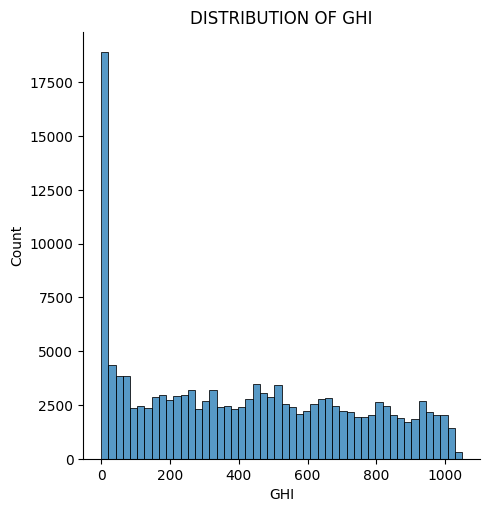

In [ ]:
# Visualizing the distribution of the target variable 'GHI'
sns.displot(solar_ir_df_nondark_encoded['GHI']);
plt.title("DISTRIBUTION OF GHI")

# Computing skewness and kurtosis of the 'GHI' column
print("Skewness: %f" % solar_ir_df_nondark_encoded['GHI'].skew())
print("Kurtosis: %f" % solar_ir_df_nondark_encoded['GHI'].kurt())

Bivariate Analysis

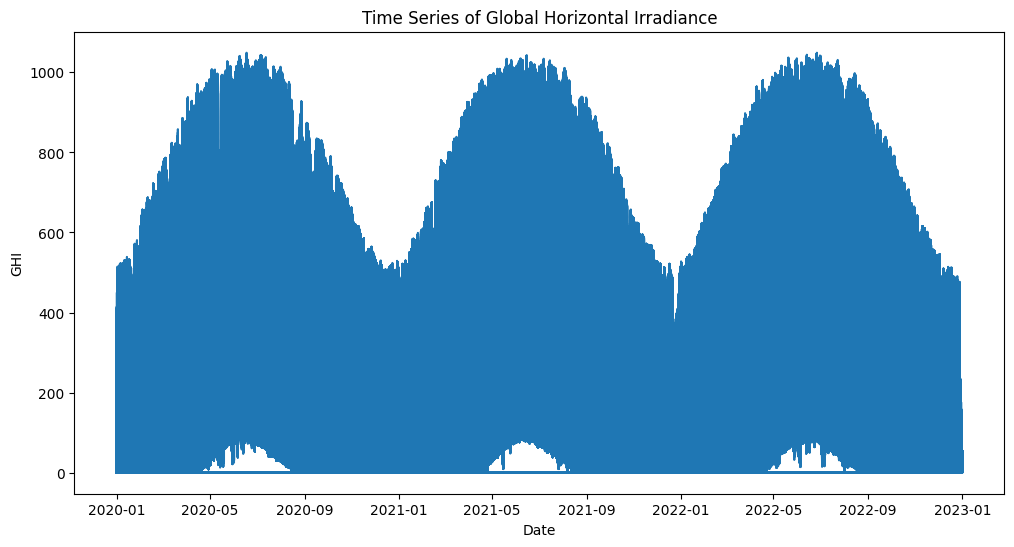

In [ ]:
data_df = solar_ir_df_nondark_encoded.copy()

# Create a datetime index
data_df['datetime'] = pd.to_datetime(data_df[['Year', 'Month', 'Day', 'Hour']])

# Set the datetime as the index
data_df = data_df.set_index('datetime')

# Plot the time series chart
plt.figure(figsize=(12, 6))
plt.plot(data_df.index, data_df['GHI'])
plt.xlabel('Date')
plt.ylabel('GHI')
plt.title('Time Series of Global Horizontal Irradiance')
plt.show()

The time series chart of Global Horizontal Irradiance (GHI) shows a clear seasonal pattern with three distinct peaks, which is consistent with the expected behavior of solar irradiance over the course of a year.
Here are the key insights from the chart:

1. Periodic Peaks: The chart exhibits three distinct peaks, which correspond to the summer months when the sun is at a higher angle, and the days are longer, leading to higher levels of solar irradiance.
2. Seasonal Variation: The periodic peaks are separated by periods of lower GHI values, which represent the winter months when the sun's angle is lower, and the days are shorter, resulting in less solar irradiance.
3. Varying Peak Magnitudes: The magnitudes of the peaks are not identical, with one peak appearing slightly higher than the others. This variation could be due to differences in weather conditions, such as cloud cover or atmospheric factors, during those specific periods.
4. Daily Fluctuations: Within each peak, there are visible fluctuations in the GHI values, which are likely due to the daily variation in solar irradiance caused by factors like cloud cover, atmospheric conditions, and the changing angle of the sun throughout the day.
5. Time Range: The time range of the data appears to be approximately three years, spanning from the beginning of 2020 to the beginning of 2023, based on the x-axis labels.

Overall, the time series chart clearly shows the expected seasonal pattern of solar irradiance, with higher values during the summer months and lower values during the winter months. The varying peak magnitudes and daily fluctuations within the peaks highlight the influence of weather conditions and other factors on the amount of solar irradiance received.

<ipython-input-41-daa0a74320bd>:5: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.pointplot(x='Month', y='value', hue='variable', data=plot_data, marker="o", palette=sns.color_palette("Spectral"))


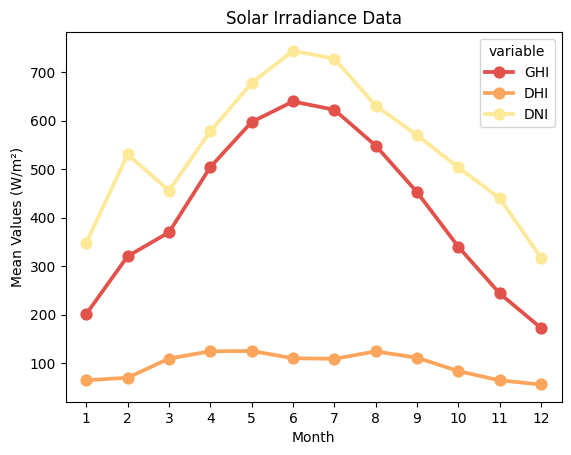

In [ ]:
# Reshaping the DataFrame using pd.melt()
plot_data = pd.melt(solar_ir_df_nondark_encoded, id_vars=['Month'], value_vars=['GHI', 'DHI', 'DNI'])

# Ploting the data
ax = sns.pointplot(x='Month', y='value', hue='variable', data=plot_data, marker="o", palette=sns.color_palette("Spectral"))
# Setting title and axis labels
plt.title('Solar Irradiance Data')
plt.xlabel('Month')
plt.ylabel('Mean Values (W/m²)')
plt.show()

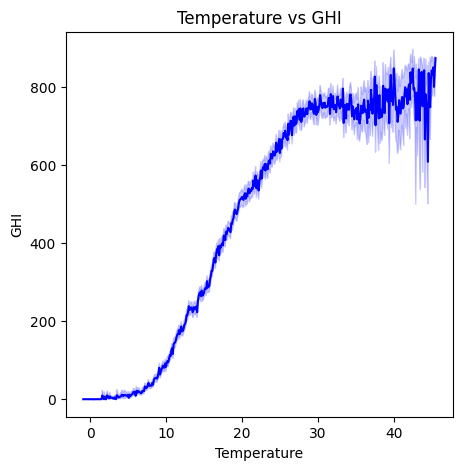

In [ ]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Temperature',y='GHI',data=solar_ir_df_nondark_encoded,color='blue')
plt.title("Temperature vs GHI")
plt.show()

The line plot highlights a non-linear, positive relationship between temperature and solar radiation (GHI), where higher temperatures are generally associated with higher levels of solar radiation, but with significant variation and potential saturation effects at higher temperatures. This relationship is likely influenced by various atmospheric and environmental factors that are not directly captured in this plot.
At lower temperatures (around 0-10°C), the GHI values are concentrated near zero, indicating low or no solar radiation.
As the temperature increases (approximately 10-25°C), the GHI values start to increase rapidly, suggesting that higher temperatures are associated with higher levels of solar radiation.
Beyond a certain temperature (around 25-30°C), the GHI values seem to plateau or even decrease slightly, indicating a potential saturation effect or the influence of other factors affecting solar radiation.
There is a significant amount of variation in the GHI values at higher temperatures, which could be attributed to other variables such as cloud cover, humidity, or atmospheric conditions.

Text(0.5, 1.0, 'Hour vs GHI')

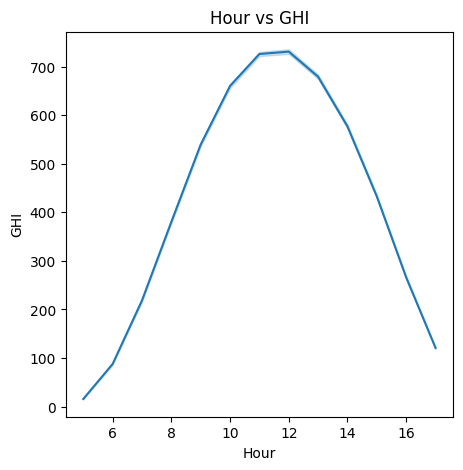

In [ ]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Hour',y='GHI',data=solar_ir_df_nondark_encoded)
plt.title("Hour vs GHI")

The graph depicts a curve in the shape of a bell, with GHI values increasing from around 6 AM, reaching a peak around 11 AM to 12 PM, and then decreasing again until 4 PM. This pattern suggests that the GHI variable, which likely represents Global Horizontal Irradiance or solar radiation intensity, follows a diurnal cycle, reaching its maximum around midday when the sun is at its highest point and then decreasing towards the evening hours.

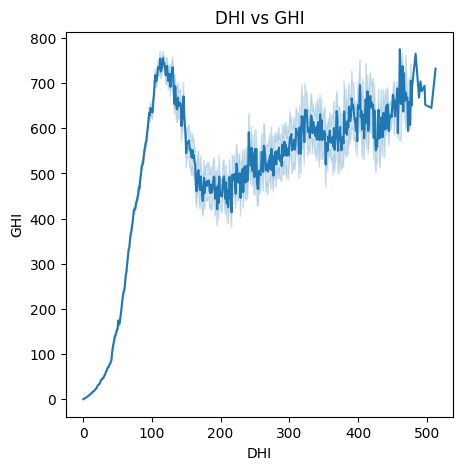

In [ ]:
# Setting the size of the figure
plt.figure(figsize=(5,5))
# Creating the line plot of the figure
sns.lineplot(x='DHI',y='GHI',data=solar_ir_df_nondark_encoded)
# Setting title for the plot
plt.title("DHI vs GHI")
# Displaying the plot
plt.show()

The plot displays a non-linear relationship between DHI and GHI. At lower values of DHI, the GHI values increase rapidly, forming a steep curve. As DHI increases further, the rate of increase in GHI slows down, and the curve appears to flatten out. Overall, the plot suggests a positive correlation between DHI and GHI, where higher values of DHI generally correspond to higher values of GHI, but the relationship is not strictly linear.

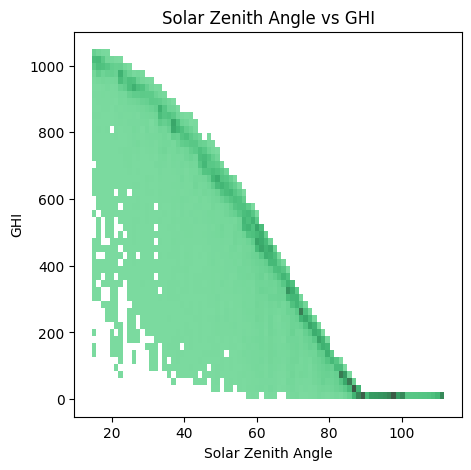

In [ ]:
# Setting the size of the figure
plt.figure(figsize=(5,5))
# Creating the line plot of the figure
sns.histplot(x='Solar Zenith Angle',y='GHI',data=solar_ir_df_nondark_encoded,color='seagreen')
# Setting title for the plot
plt.title("Solar Zenith Angle vs GHI")
# Displaying the plot
plt.show()

The plot effectively illustrates the inverse correlation between Solar Zenith Angle and GHI, where lower Solar Zenith Angles (closer to the sun's position being directly overhead) correspond to higher GHI values, while higher Solar Zenith Angles (sun's position being more oblique) result in lower GHI values.

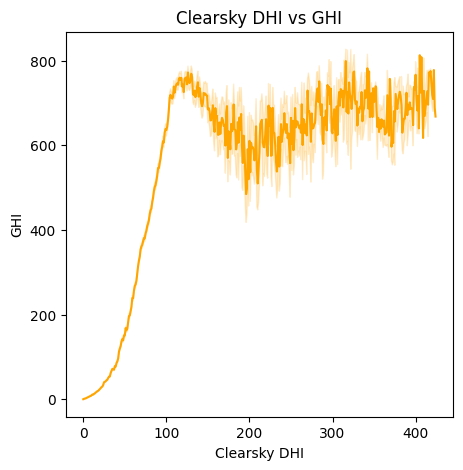

In [ ]:
# Setting the size of the figure
plt.figure(figsize=(5,5))
# Creating the line plot of the figure
sns.lineplot(x='Clearsky DHI',y='GHI',data=solar_ir_df_nondark_encoded,color='orange')
# Setting title for the plot
plt.title("Clearsky DHI vs GHI")
# Displaying the plot
plt.show()

The plot displays a distinct curve, where the GHI values start increasing rapidly for low Clearsky DHI values, forming a steep curve initially. As the Clearsky DHI values increase further, the rate of increase in GHI slows down, and the curve flattens out, showing a non-linear relationship between the two variables.

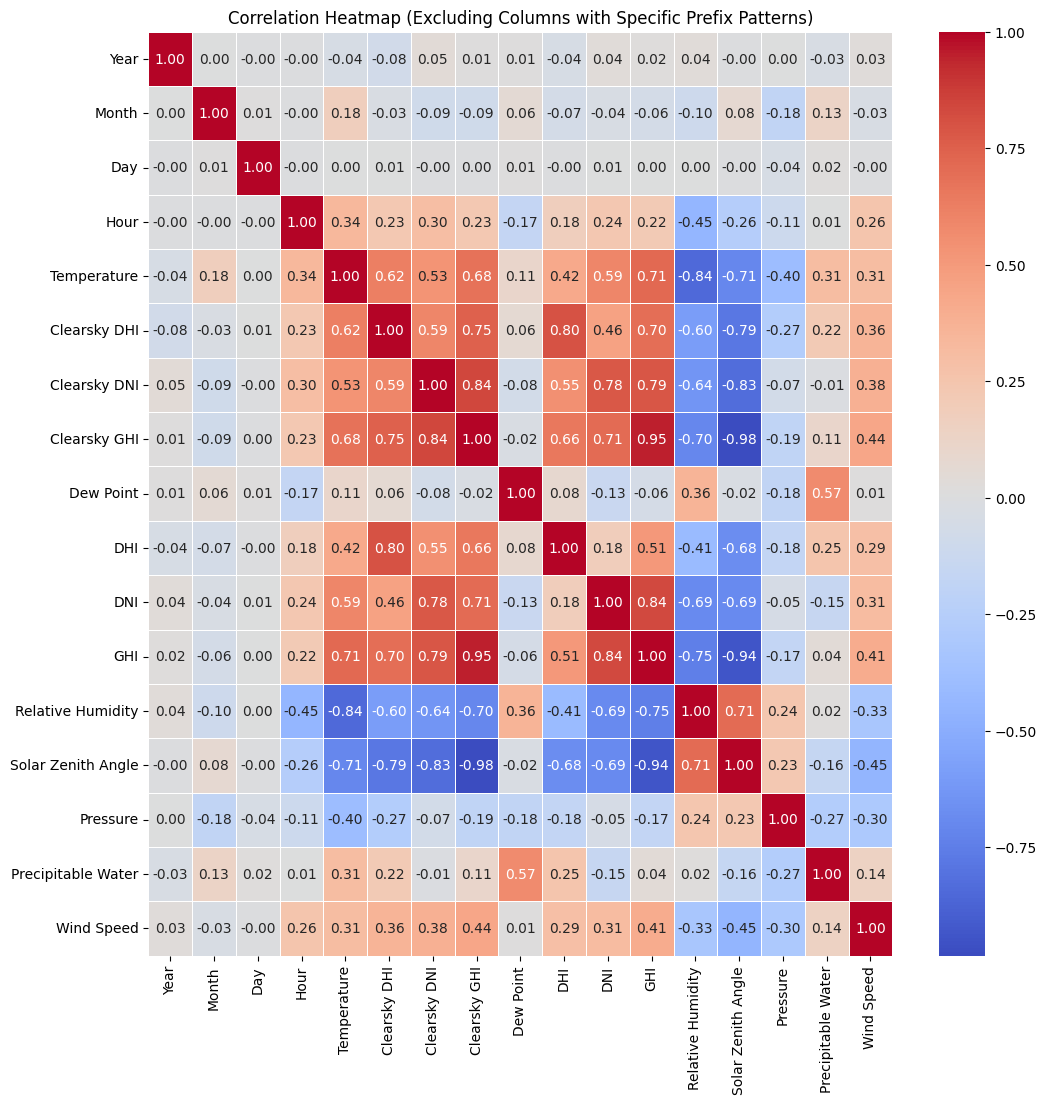

In [ ]:
# Getting columns to exclude based on prefix patterns
columns_to_exclude = [col for col in solar_ir_df_nondark_encoded.columns if any(re.match(pattern, col) for pattern in columns_to_encode)]

# Dropping columns with specified prefix patterns
df_for_correlation = solar_ir_df_nondark_encoded.drop(columns=columns_to_exclude)

# Computing the correlation matrix
correlation_matrix = df_for_correlation.corr()

# Creating a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Excluding Columns with Specific Prefix Patterns)")
plt.show()


#### Remove Clear SKY GHI, Clear SKY DHI, Clear SKY DNI, DNI, DHI, Solar Zenith Angle, Relative Humidity as they are highly corelated features.

In [ ]:
# Dropping the "Clearsky GHI", "Clearsky DHI", "Clearsky DNI", "DHI", "DNI", "Solar Zenith Angle", "Relative Humidity"
columns_to_drop = ["Clearsky GHI", "Clearsky DHI", "Clearsky DNI", "DHI", "DNI", "Solar Zenith Angle","Relative Humidity"]
solar_ir_df_nondark_encoded.drop(columns=columns_to_drop, inplace=True)

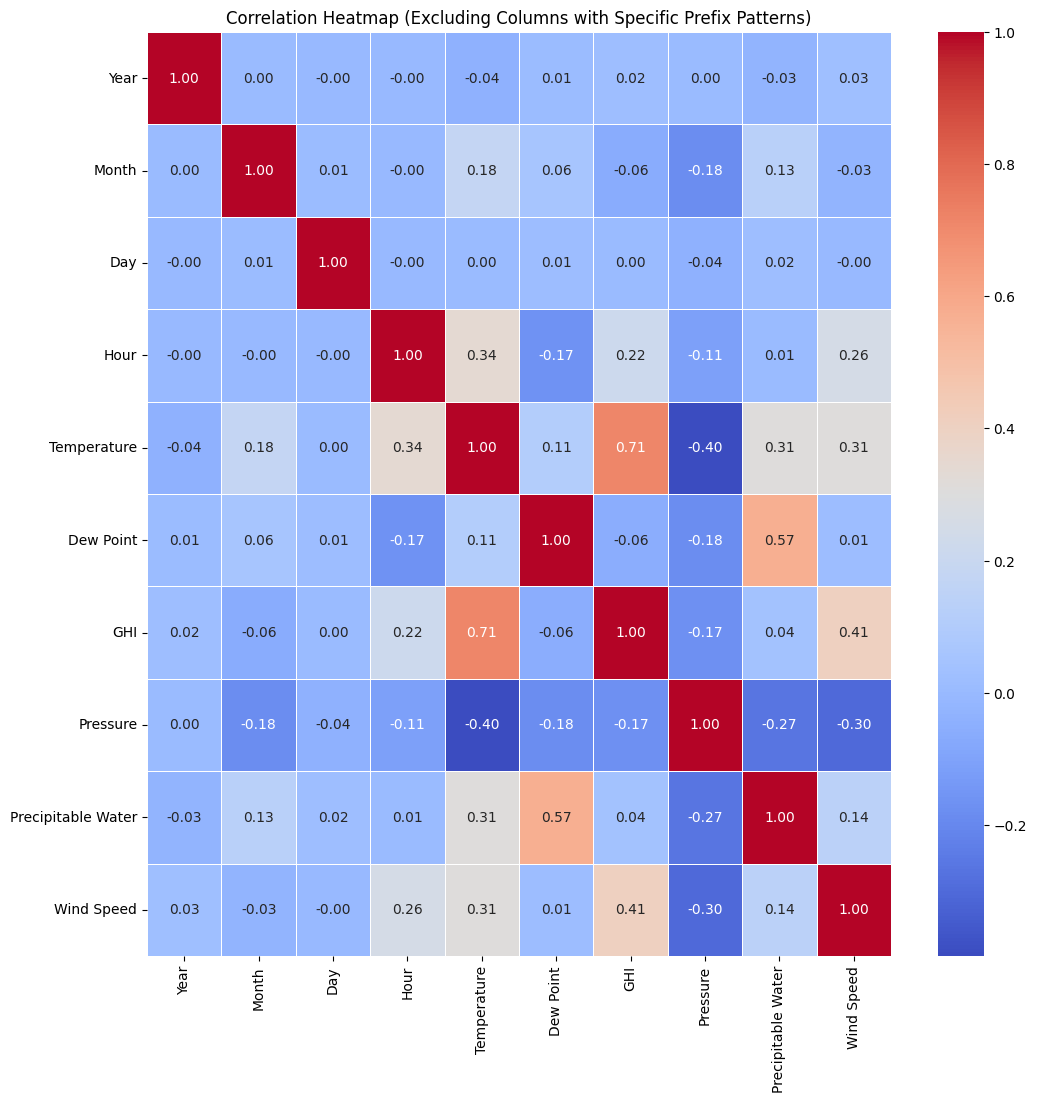

In [ ]:
# Getting columns to exclude based on prefix patterns
columns_to_exclude = [col for col in solar_ir_df_nondark_encoded.columns if any(re.match(pattern, col) for pattern in columns_to_encode)]

# Dropping columns with specified prefix patterns
df_for_correlation = solar_ir_df_nondark_encoded.drop(columns=columns_to_exclude)

# Computing the correlation matrix
correlation_matrix = df_for_correlation.corr()

# Creating a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Excluding Columns with Specific Prefix Patterns)")
plt.show()


## Modeling

In [ ]:
#Importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_log_error, median_absolute_error, max_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor # for VIF
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import pickle

In [ ]:
modeling_df= solar_ir_df_nondark_encoded.copy()

In [ ]:
# Separating features (X) and target variable (y)
X = modeling_df.drop(columns=['GHI'])
y = modeling_df['GHI']

In [ ]:
# Splitting the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### Modeling - Linear regression

In [ ]:
# Initializing and train a linear regression model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Making predictions on the testing set
mlr_y_pred = mlr_model.predict(X_test)

# Evaluating the model using MSE
mlr_base_mse = mean_squared_error(y_test, mlr_y_pred)
print("Mean squared error of linear regression model:", mlr_base_mse)

Mean squared error of linear regression model: 19474.732651798633


#### Checking assumptions of linear regression i.e.
1) Linearity: The relationship between the independent variables (features) and the dependent variable (target) should be linear; this can be assessed by looking a scatter plot of the dependent vs independent variable individually

2) Independence: The residuals (the differences between the observed and predicted values) should be independent of each other

3) Homoscedasticity: The variance of the residuals should be constant across all levels of the independent variables

4) Normality: The residuals should be normally distributed

5) Multicollinearity: If two or more predictor variables in a regression model are highly correlated, this can cause issues in linear regression, such as unstable coefficient estimates and difficulty in interpreting the model. Multicollinearity can be quantified using  variance inflation factor (VIF) for each predictor variable. VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity. VIF should ideally be <4 but in practice, VIF > 10 is considered problematic

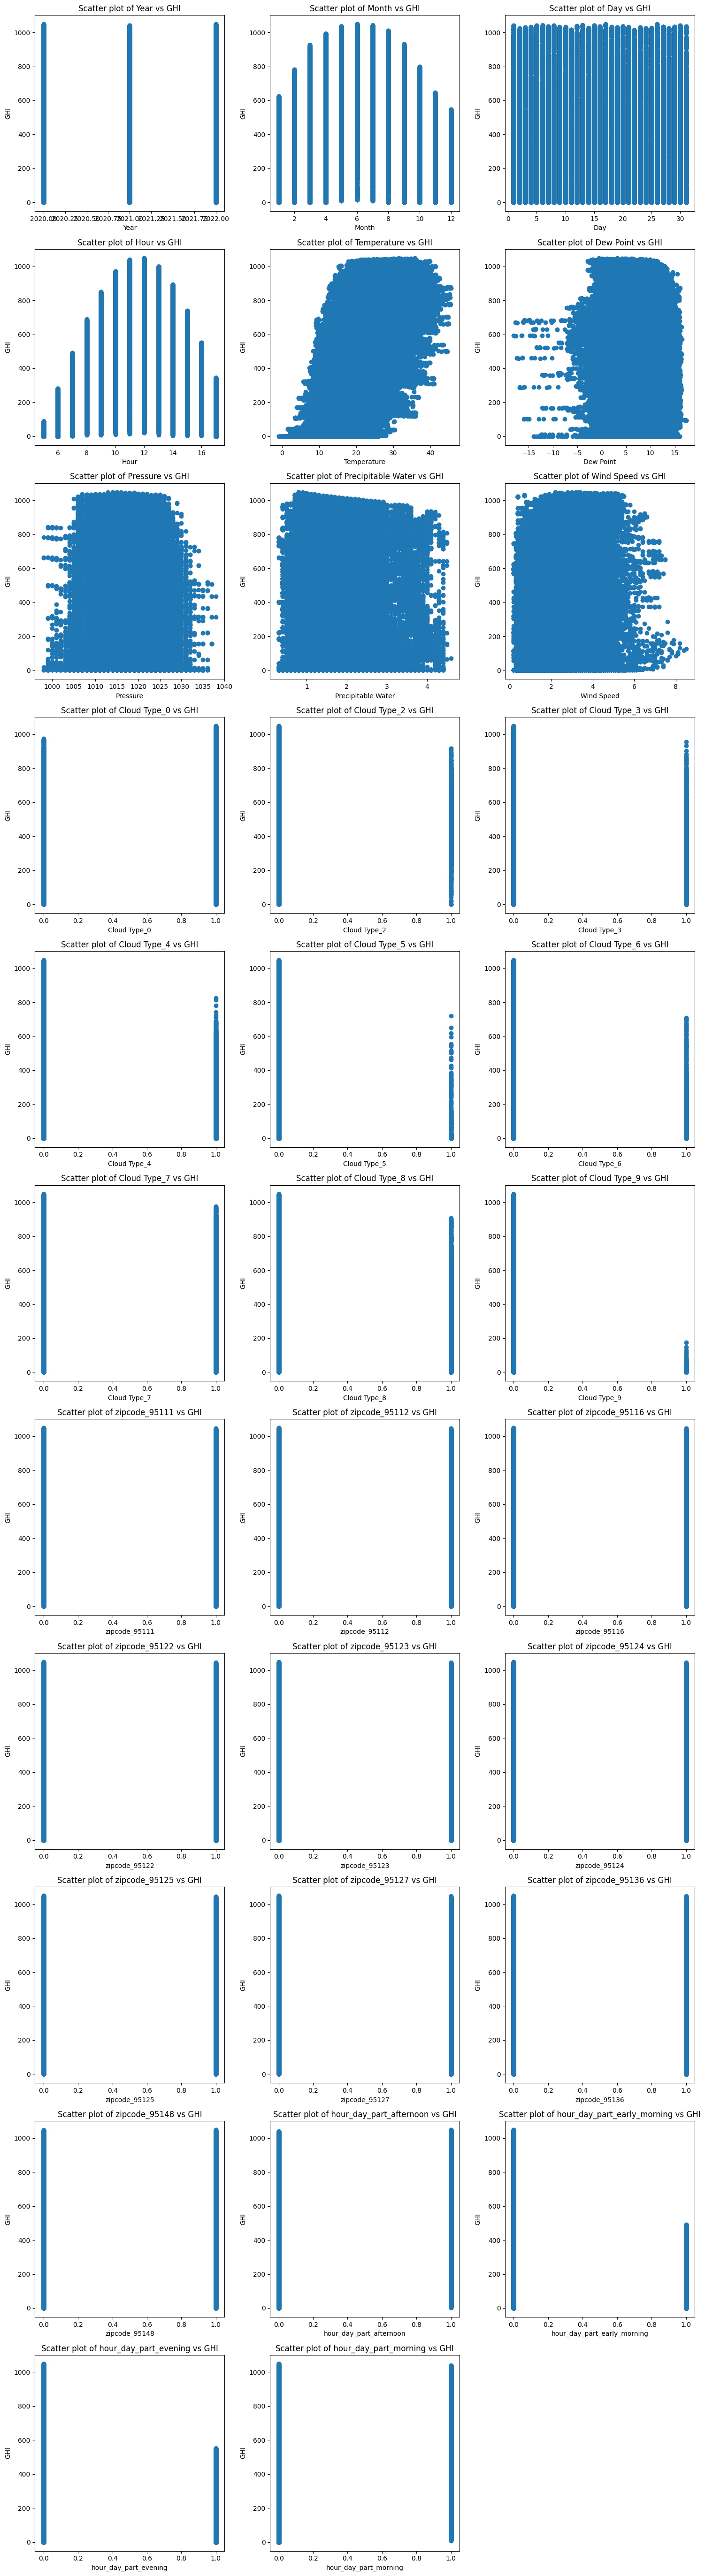

In [ ]:
# Linearity check

# Calculating the number of rows and columns for the subplot grid
num_features = len(X.columns)
num_cols = 3  # Number of columns for the subplot grid
num_rows = math.ceil(num_features / num_cols)

# Creating a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Plotting scatter plots for each independent variable against the dependent variable
for i, column in enumerate(X.columns):
    axes[i].scatter(X[column], y)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('GHI')
    axes[i].set_title(f'Scatter plot of {column} vs GHI')

# Hiding empty subplots
for j in range(num_features, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

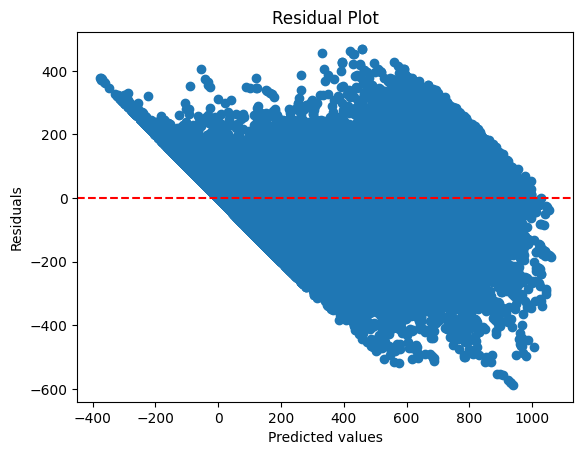

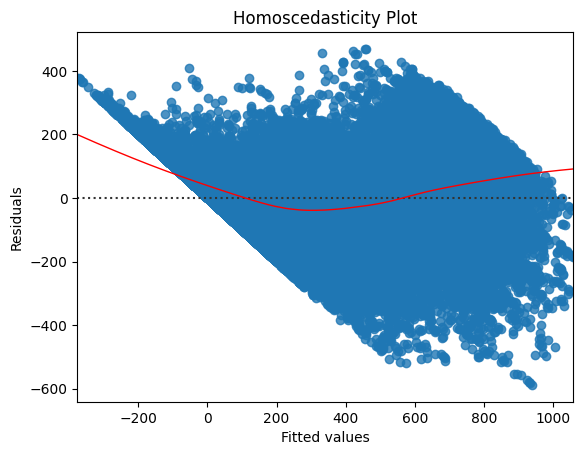

In [ ]:
# Homoscedasticity check
# Residual plot
residuals = y_test - mlr_y_pred
plt.scatter(mlr_y_pred, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Homoscedasticity plot
sns.residplot(x=mlr_y_pred.flatten(), y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Plot")
plt.show()

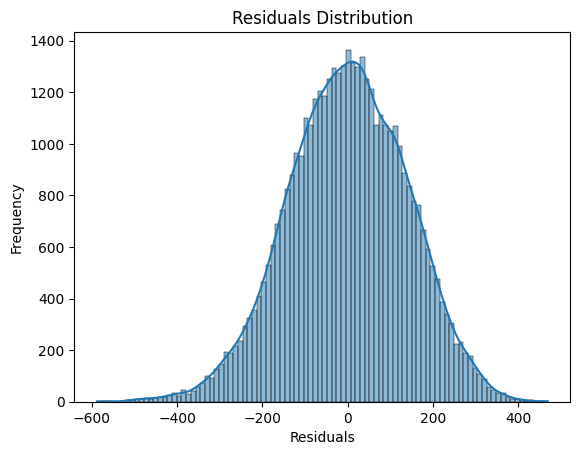

In [ ]:
# Normality assumption
# Normality plot i.e. Q-Q plot
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                       Variable        VIF
0                          Year   1.031961
1                         Month   1.092343
2                           Day   1.006153
3                          Hour  14.984711
4                   Temperature   2.377958
5                     Dew Point   1.646358
6                      Pressure   1.911031
7            Precipitable Water   1.886541
8                    Wind Speed   1.428997
9                  Cloud Type_0        inf
10                 Cloud Type_2        inf
11                 Cloud Type_3        inf
12                 Cloud Type_4        inf
13                 Cloud Type_5        inf
14                 Cloud Type_6        inf
15                 Cloud Type_7        inf
16                 Cloud Type_8        inf
17                 Cloud Type_9        inf
18                zipcode_95111        inf
19                zipcode_95112        inf
20                zipcode_95116        inf
21                zipcode_95122        inf
22         

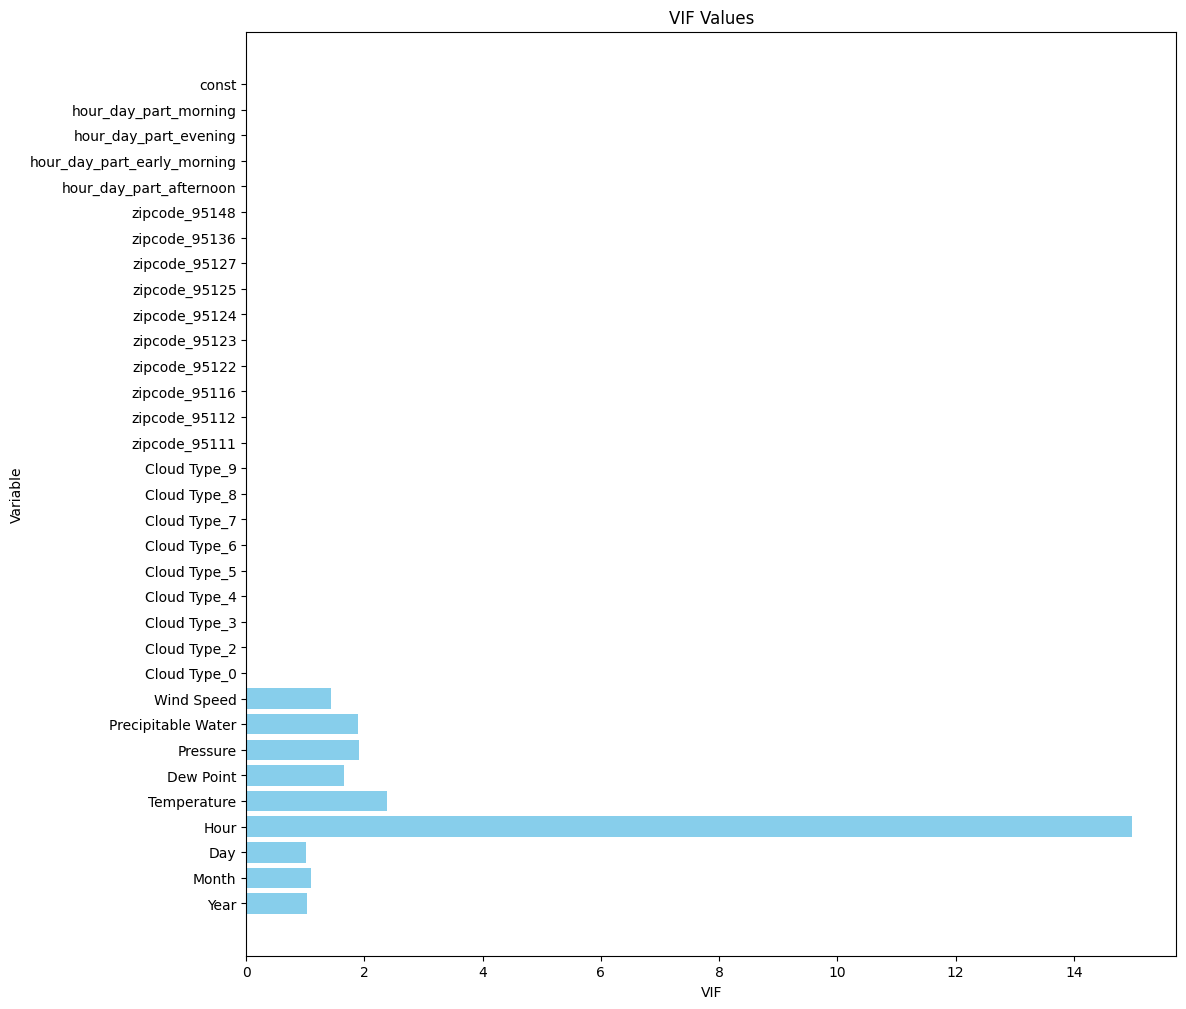

In [ ]:
# Multicollinearity assumption

# Calculating VIF for each predictor variable
vif_data = X.assign(const=1)  # Adding constant for intercept term
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

print(vif)

# Plotting VIF values
plt.figure(figsize=(12, 12))
plt.barh(vif["Variable"], vif["VIF"], color='skyblue')
plt.xlabel('VIF')
plt.ylabel('Variable')
plt.title('VIF Values')
plt.show()

In [ ]:
# Calculating evaluation metrics for linear regression
mlr_mse = mean_squared_error(y_test, mlr_y_pred)
mlr_rmse = mean_squared_error(y_test, mlr_y_pred, squared=False)  # RMSE
mlr_mae = mean_absolute_error(y_test, mlr_y_pred)
mlr_mape = mean_absolute_percentage_error(y_test, mlr_y_pred)
mlr_medae = median_absolute_error(y_test, mlr_y_pred)
mlr_r2 = r2_score(y_test, mlr_y_pred)

print("Mean Squared Error (MSE) of  linear regression:", mlr_mse)
print("Root Mean Squared Error (RMSE) of linear regression:", mlr_rmse)
print("Mean Absolute Error (MAE) of  linear regression:", mlr_mae)
print("Mean Absolute Percentage Error (MAPE) of  linear regression:", mlr_mape)
print("Median Absolute Error (MedAE) of  linear regression:", mlr_medae)
print("R-squared (R²) of linear regression:", mlr_r2)

Mean Squared Error (MSE) of  linear regression: 19474.732651798633
Root Mean Squared Error (RMSE) of linear regression: 139.55189949190455
Mean Absolute Error (MAE) of  linear regression: 111.84194090803389
Mean Absolute Percentage Error (MAPE) of  linear regression: 3.691775388729127e+16
Median Absolute Error (MedAE) of  linear regression: 96.36068904109925
R-squared (R²) of linear regression: 0.8032830231088364


**Saving the Linear Regresssion model**

In [ ]:
Pkl_Filename = "Pickle_LR_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(mlr_model, file)

**Loading the model**

In [ ]:
with open(Pkl_Filename, 'rb') as file:
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LinearRegression()

In [ ]:
# Defining a function to plot actual vs predicted given actual, predicted and title as input
def plot_actual_vs_predicted(y_actual, y_pred, title, actual_color='blue', predicted_color='orange'):
    """
    Plot actual vs predicted values and display evaluation metrics.

    Parameters:
        y_actual (array-like): Array-like object containing the actual values.
        y_pred (array-like): Array-like object containing the predicted values.
        actual_color (str): Color for the actual values (default is 'blue').
        predicted_color (str): Color for the predicted values (default is 'orange').
        title (str): Title for the plot.
    """
    # Calculating evaluation metrics to display on chart
    r_squared = r2_score(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    rmse = np.sqrt(mse)

    # Plotting actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_actual, y_actual, color=actual_color, label='Actual', alpha=0.5)
    plt.scatter(y_actual, y_pred, color=predicted_color, label='Predicted', alpha=0.5)
    plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='green', linestyle='--', label='Perfect Fit')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.legend()
    plt.grid(True)

    # Displaying evaluation metrics on the chart
    plt.text(0.05, 0.95, f'R^2: {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    plt.text(0.05, 0.90, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    plt.text(0.05, 0.85, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

    # Setting legend to bottom right
    plt.legend(loc='lower right')

    plt.show()

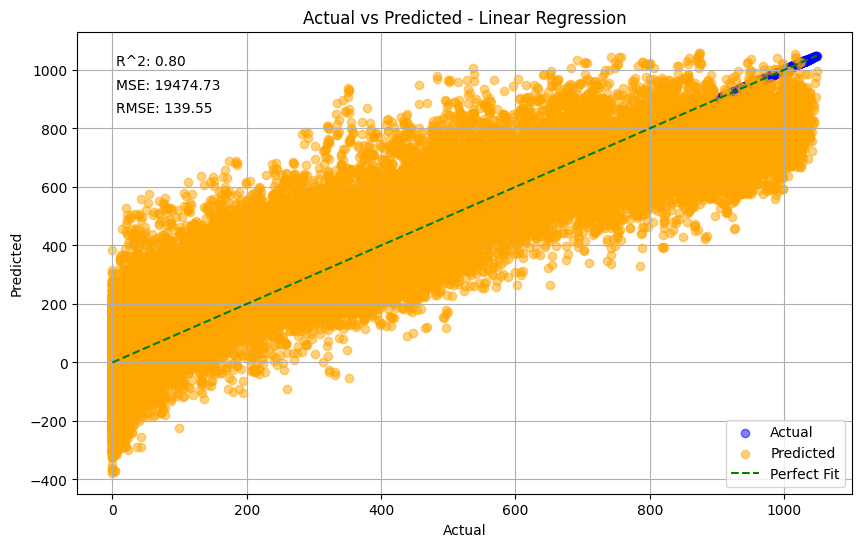

In [ ]:
# Actual vs predicted plot for linear regression
plot_actual_vs_predicted(y_test, mlr_y_pred, 'Actual vs Predicted - Linear Regression')

### Modeling - Random Forest regression

In [ ]:
# Modeling iteration with default parameters i.e. base model
# Initializing and training a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=123)
rf_model.fit(X_train, y_train)

# Making predictions on the testing set
rf_y_pred = rf_model.predict(X_test)

# Calculating evaluation metrics of the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mape = mean_absolute_percentage_error(y_test, rf_y_pred)
rf_msle = mean_squared_log_error(y_test, rf_y_pred)
rf_medae = median_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Mean Squared Error (MSE) of Random Forest Regression base model:", rf_mse)
print("Root Mean Squared Error (RMSE) of Random Forest Regression base model:", rf_rmse)
print("Mean Absolute Error (MAE) of Random Forest Regression base model:", rf_mae)
print("Mean Absolute Percentage Error (MAPE) of  Random Forest regression:", rf_mape)
print("Mean Squared logarithmic Error (MSLE) of  Random Forest regression:", rf_msle)
print("Median Absolute Error (MedAE) of  Random Forest regression:", rf_medae)
print("R-squared (R²) of Random Forest Regression base model:", rf_r2)

Mean Squared Error (MSE) of Random Forest Regression base model: 521.1579789818454
Root Mean Squared Error (RMSE) of Random Forest Regression base model: 22.828884751162185
Mean Absolute Error (MAE) of Random Forest Regression base model: 8.75799410443571
Mean Absolute Percentage Error (MAPE) of  Random Forest regression: 82373180438764.03
Mean Squared logarithmic Error (MSLE) of  Random Forest regression: 0.022253115251757043
Median Absolute Error (MedAE) of  Random Forest regression: 1.580000000000041
R-squared (R²) of Random Forest Regression base model: 0.9947357109367789


**Saving the Radom Forest model**

In [ ]:
Pkl_Filename = "Pickle_RF_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(rf_model, file)
with open(Pkl_Filename, 'rb') as file:
    Pickled_RF_Model = pickle.load(file)

Pickled_RF_Model

RandomForestRegressor(random_state=123)

In [ ]:
# Hyperparameter tuning for the RF model
# Defining the grid of hyperparameters to search
param_grid_rf = {
    'max_depth': [8, 10],
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing and training the Grid Search CV
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=123), param_grid_rf, cv=2, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Obtaining the best parameters and the best model
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

# Making predictions on the testing set using the best model
best_rf_y_pred = best_rf_model.predict(X_test)

# Calculating evaluation metrics of the model
best_rf_mse = mean_squared_error(y_test, best_rf_y_pred)
best_rf_rmse = mean_squared_error(y_test, best_rf_y_pred, squared=False)
best_rf_mae = mean_absolute_error(y_test, best_rf_y_pred)
best_rf_mape = mean_absolute_percentage_error(y_test, best_rf_y_pred)
best_rf_msle = mean_squared_log_error(y_test, best_rf_y_pred)
best_rf_medae = median_absolute_error(y_test, best_rf_y_pred)
best_rf_r2 = r2_score(y_test, best_rf_y_pred)

print("Tuned Random Forest Regression:")
print("Best parameters after hyperparameter tuning of the RF model:", best_params_rf)
print("Mean Squared Error (MSE) of Random Forest Regression tuned model:", best_rf_mse)
print("Root Mean Squared Error (RMSE) of Random Forest Regression tuned model:", best_rf_rmse)
print("Mean Absolute Error (MAE) of Random Forest Regression tuned model:", best_rf_mae)
print("Mean Absolute Percentage Error (MAPE) of  Random Forest regression:", best_rf_mape)
print("Mean Squared logarithmic Error (MSLE) of  Random Forest regression:", best_rf_msle)
print("Median Absolute Error (MedAE) of  Random Forest regression:", best_rf_medae)
print("R-squared (R²) of Random Forest Regression tuned model:", best_rf_r2)

Tuned Random Forest Regression:
Best parameters after hyperparameter tuning of the RF model: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}
Mean Squared Error (MSE) of Random Forest Regression tuned model: 2907.10417040341
Root Mean Squared Error (RMSE) of Random Forest Regression tuned model: 53.91756829089578
Mean Absolute Error (MAE) of Random Forest Regression tuned model: 32.649765950786595
Mean Absolute Percentage Error (MAPE) of  Random Forest regression: 346981665884200.75
Mean Squared logarithmic Error (MSLE) of  Random Forest regression: 0.09173388374096854
Median Absolute Error (MedAE) of  Random Forest regression: 16.9220481945365
R-squared (R²) of Random Forest Regression tuned model: 0.9706349373758085


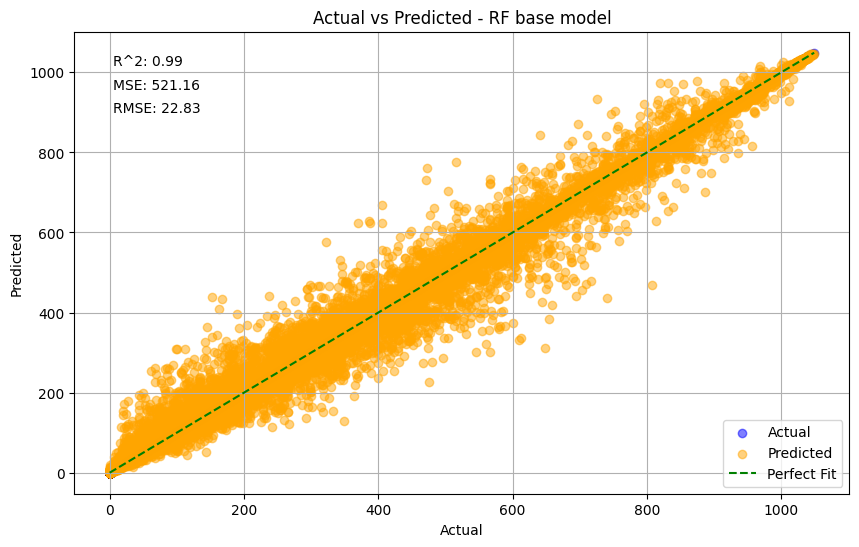

In [ ]:
# Actual vs predicted plot for Random forest base model
plot_actual_vs_predicted(y_test, rf_y_pred, 'Actual vs Predicted - RF base model')

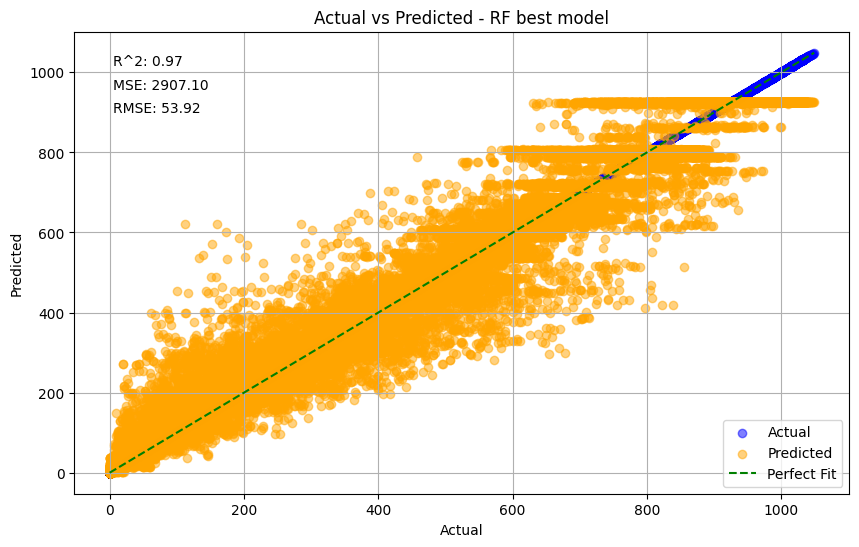

In [ ]:
# Actual vs predicted plot for Random forest tuned model
plot_actual_vs_predicted(y_test, best_rf_y_pred, 'Actual vs Predicted - RF best model')

**Saving the best random forest model**

In [ ]:
Pkl_Filename = "Pickle_best_RF_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(best_rf_model, file)
with open(Pkl_Filename, 'rb') as file:
    Pickled_best_RF_Model = pickle.load(file)

Pickled_best_RF_Model

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=123)

XGBoost Regression

In [ ]:
# Define and train the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=123)
xgb_model.fit(X_train, y_train)

# Making predictions on the testing set
xgb_y_pred = xgb_model.predict(X_test)

# Calculating evaluation metrics of the model
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = mean_squared_error(y_test, xgb_y_pred, squared=False)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_y_pred)
xgb_medae = median_absolute_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print("Mean Squared Error (MSE) of XGBoost Regression base model:", xgb_mse)
print("Root Mean Squared Error (RMSE) of XGBoost Regression base model:", xgb_rmse)
print("Mean Absolute Error (MAE) of XGBoost Regression base model:", xgb_mae)
print("Mean Absolute Percentage Error (MAPE) of  XGboost regression:", xgb_mape)
print("Median Absolute Error (MedAE) of  XGboost regression:", xgb_medae)
print("R-squared (R²) of XGBoost Regression base model:", xgb_r2)

Mean Squared Error (MSE) of XGBoost Regression base model: 1119.118370514142
Root Mean Squared Error (RMSE) of XGBoost Regression base model: 33.453226608417644
Mean Absolute Error (MAE) of XGBoost Regression base model: 20.23036727192768
Mean Absolute Percentage Error (MAPE) of  XGboost regression: 3184748219107199.5
Median Absolute Error (MedAE) of  XGboost regression: 11.804981231689453
R-squared (R²) of XGBoost Regression base model: 0.9886956300470408


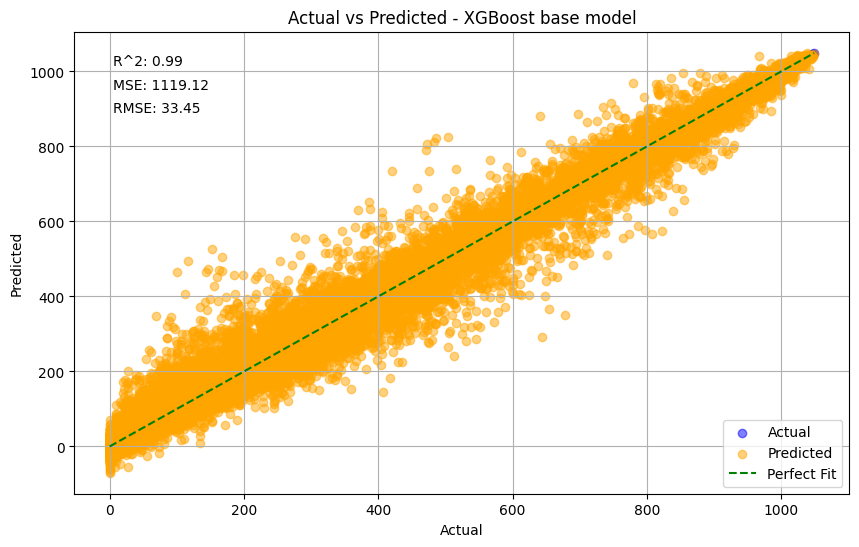

In [ ]:
# Actual vs predicted plot for XGboost regression base model
plot_actual_vs_predicted(y_test, xgb_y_pred, 'Actual vs Predicted - XGBoost base model')

**Saving the XGBoost Model**

In [ ]:
Pkl_Filename = "Pickle_xgb_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(xgb_model, file)
with open(Pkl_Filename, 'rb') as file:
    Pickled_xgb_Model = pickle.load(file)

Pickled_xgb_Model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=2, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Obtaining the best parameters and the best model
best_params_xgb = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_

# Making predictions on the testing set using the best model
best_xgb_y_pred = best_xgb_model.predict(X_test)

# Calculating evaluation metrics of the model
best_xgb_mse = mean_squared_error(y_test, best_xgb_y_pred)
best_xgb_rmse = mean_squared_error(y_test, best_xgb_y_pred, squared=False)
best_xgb_mae = mean_absolute_error(y_test, best_xgb_y_pred)
best_xgb_mape = mean_absolute_percentage_error(y_test, best_xgb_y_pred)
best_xgb_medae = median_absolute_error(y_test, best_xgb_y_pred)
best_xgb_r2 = r2_score(y_test, best_xgb_y_pred)

print("Tuned XGboost Regression:")
print("Best Parameters:", best_params_xgb)
print("Mean Squared Error (MSE) of XGboost Regression tuned model:", best_xgb_mse)
print("Root Mean Squared Error (RMSE) of XGboost Regression tuned model:", best_xgb_rmse)
print("Mean Absolute Error (MAE) of XGboost Regression tuned model:", best_xgb_mae)
print("Mean Absolute Percentage Error (MAPE) of  XGboost regression:", best_xgb_mape)
print("Median Absolute Error (MedAE) of  XGboost regression:", best_xgb_medae)
print("R-squared (R²) of XGboost Regression tuned model:", best_xgb_r2)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
Tuned XGboost Regression:
Best Parameters: {'max_depth': 7, 'n_estimators': 300}
Mean Squared Error (MSE) of XGboost Regression tuned model: 675.4533119400144
Root Mean Squared Error (RMSE) of XGboost Regression tuned model: 25.989484641677958
Mean Absolute Error (MAE) of XGboost Regression tuned model: 14.242414463407801
Mean Absolute Percentage Error (MAPE) of  XGboost regression: 2055217358152926.5
Median Absolute Error (MedAE) of  XGboost regression: 7.5797882080078125
R-squared (R²) of XGboost Regression tuned model: 0.9931771523680613


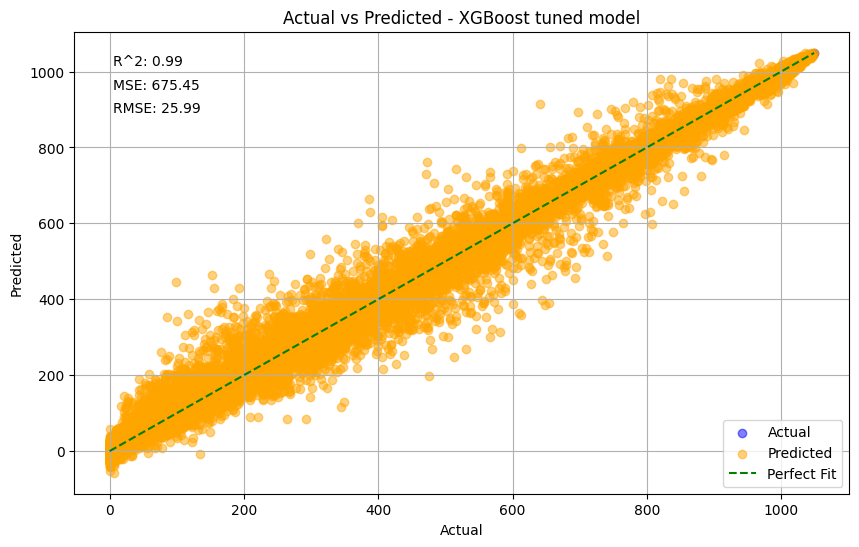

In [ ]:
# Actual vs predicted plot for XGboost regression tuned model
plot_actual_vs_predicted(y_test, best_xgb_y_pred, 'Actual vs Predicted - XGBoost tuned model')

**Saving the best XGBoost Model**

In [ ]:
Pkl_Filename = "Pickle_best_xgb_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(best_xgb_model, file)
with open(Pkl_Filename, 'rb') as file:
    Pickled_best_xgb_Model = pickle.load(file)

Pickled_best_xgb_Model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

### Modeling - Support vector machine (SVM) regression

In [ ]:
# Modeling iteration with default parameters i.e. base model
# Initializing and training a Support Vector Machine Regression model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Making predictions on the testing set
svm_y_pred = svm_model.predict(X_test)

# Calculating evaluation metrics the model
svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_rmse = mean_squared_error(y_test, svm_y_pred, squared=False)
svm_mae = mean_absolute_error(y_test, svm_y_pred)
svm_mape = mean_absolute_percentage_error(y_test, svm_y_pred)
svm_msle = mean_squared_log_error(y_test, svm_y_pred)
svm_medae = median_absolute_error(y_test, svm_y_pred)
svm_r2 = r2_score(y_test, svm_y_pred)

print("Mean Squared Error (MSE) of SVM Regression base model:", svm_mse)
print("Root Mean Squared Error (RMSE) of SVM Regression base model:", svm_rmse)
print("Mean Absolute Error (MAE) of SVM Regression base model:", svm_mae)
print("Mean Absolute Percentage Error (MAPE) of  SVM Regression regression:", svm_mape)
print("Mean Squared logarithmic Error (MSLE) of  SVM Regression regression:", svm_msle)
print("Median Absolute Error (MedAE) of  SVM Regression regression:", svm_medae)
print("R-squared (R²) of SVM Regression base model:", svm_r2)

Mean Squared Error (MSE) of SVM Regression base model: 98749.69520744953
Root Mean Squared Error (RMSE) of SVM Regression base model: 314.2446422891718
Mean Absolute Error (MAE) of SVM Regression base model: 271.26611417482246
Mean Absolute Percentage Error (MAPE) of  SVM Regression regression: 1.635910066610792e+17
Mean Squared logarithmic Error (MSLE) of  SVM Regression regression: 4.582872957617638
Median Absolute Error (MedAE) of  SVM Regression regression: 273.71590864393295
R-squared (R²) of SVM Regression base model: 0.002515625890289086


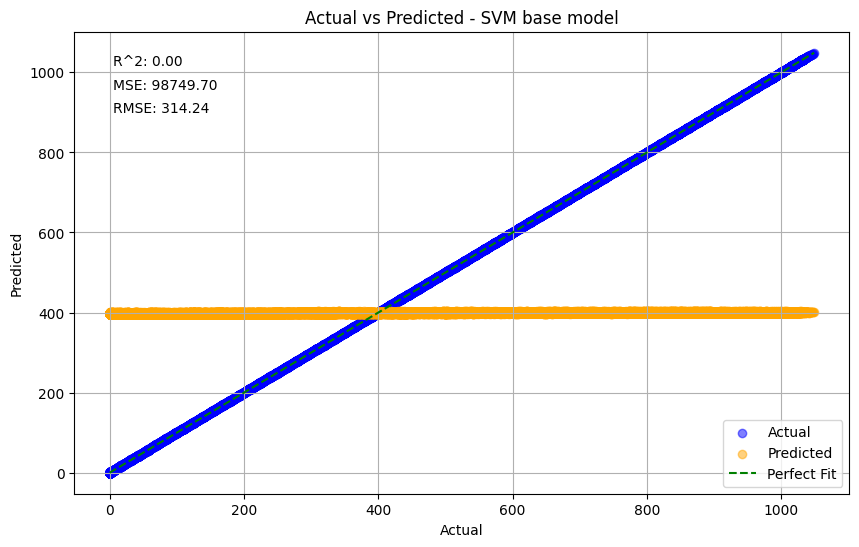

In [ ]:
# Actual vs predicted plot for SVM regression base model
plot_actual_vs_predicted(y_test, svm_y_pred, 'Actual vs Predicted - SVM base model')

**Saving the SVM model**

In [ ]:
Pkl_Filename = "Pickle_svm_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(svm_model, file)
with open(Pkl_Filename, 'rb') as file:
    Pickled_svm_Model = pickle.load(file)

Pickled_svm_Model

SVR()

In [ ]:
# Hyperparameter tuning for the SVM model
# Defining the grid of hyperparameters to search
param_grid_svm = {
    'C': [0.1, 1, 10],
   # 'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf','poly']
}

# Initializing and training the Grid Search CV
grid_search_svm = GridSearchCV(SVR(), param_grid_svm, cv=2, scoring='neg_mean_squared_error')
grid_search_svm.fit(X_train, y_train)

# Obtaining the best parameters and the best model
best_params_svm = grid_search_svm.best_params_
best_svm_model = grid_search_svm.best_estimator_

# Making predictions on the testing set using the best model
best_svm_y_pred = best_svm_model.predict(X_test)

# Calculating evaluation metrics of the model
best_svm_mse = mean_squared_error(y_test, best_svm_y_pred)
best_svm_rmse = mean_squared_error(y_test, best_svm_y_pred, squared=False)
best_svm_mae = mean_absolute_error(y_test, best_svm_y_pred)
best_svm_mape = mean_absolute_percentage_error(y_test, svm_y_pred)
best_svm_msle = mean_squared_log_error(y_test, svm_y_pred)
best_svm_medae = median_absolute_error(y_test, svm_y_pred)
best_svm_r2 = r2_score(y_test, best_svm_y_pred)

print("Tuned Support Vector Machine (SVM) Regression:")
print("Best Parameters:", best_params_svm)
print("Mean Squared Error (MSE) of SVM Regression tuned model:", best_svm_mse)
print("Root Mean Squared Error (RMSE) of SVM Regression tuned model:", best_svm_rmse)
print("Mean Absolute Error (MAE) of SVM Regression tuned model:", best_svm_mae)
print("Mean Absolute Percentage Error (MAPE) of  SVM Regression regression:", best_svm_mape)
print("Mean Squared logarithmic Error (MSLE) of  SVM Regression regression:", best_svm_msle)
print("Median Absolute Error (MedAE) of SVM Regression regression:", best_svm_medae)
print("R-squared (R²) of SVM Regression tuned model:", best_svm_r2)

Tuned Support Vector Machine (SVM) Regression:
Best Parameters: {'C': 1, 'kernel': 'linear'}
Mean Squared Error (MSE) of SVM Regression tuned model: 19689.74720310284
Root Mean Squared Error (RMSE) of SVM Regression tuned model: 140.32015964608522
Mean Absolute Error (MAE) of SVM Regression tuned model: 111.4039611119036
Mean Absolute Percentage Error (MAPE) of  SVM Regression regression: 1.635910066610792e+17
Mean Squared logarithmic Error (MSLE) of  SVM Regression regression: 4.582872957617638
Median Absolute Error (MedAE) of SVM Regression regression: 273.71590864393295
R-squared (R²) of SVM Regression tuned model: 0.801111131290015


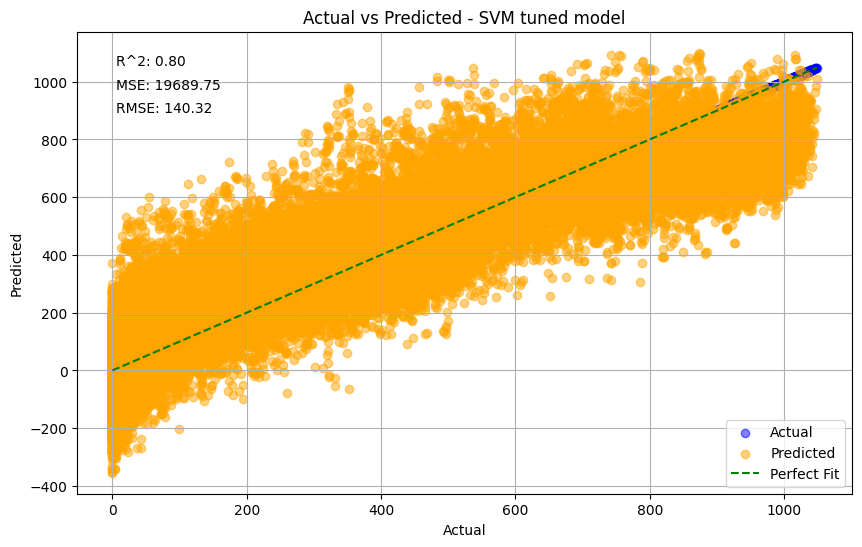

In [ ]:
# Actual vs predicted plot for SVM regression tuned model
plot_actual_vs_predicted(y_test, best_svm_y_pred, 'Actual vs Predicted - SVM tuned model')

**Saving the tuned SVM model**

In [ ]:
Pkl_Filename = "Pickle_best_svm_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(best_svm_model, file)
with open(Pkl_Filename, 'rb') as file:
    Pickled_best_svm_Model = pickle.load(file)

Pickled_best_svm_Model

SVR(C=1, kernel='linear')

### Modeling - L1 regularization i.e. Lasso regression

In [ ]:
# Defining a range of alpha values to search
alphas_lasso = [0.01, 0.1, 1, 10, 100]

best_lasso_alpha = None
best_lasso_rmse = float('inf')

# Iterating over each alpha value and fitting a Lasso Regression model
for alpha in alphas_lasso:
    # Initializing and training a Lasso Regression model
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)

    # Making predictions on the testing set
    lasso_y_pred = lasso_model.predict(X_test)

    # Evaluating the model
    lasso_rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)

    # Updating best alpha and RMSE if current RMSE is better
    if lasso_rmse < best_lasso_rmse:
        best_lasso_rmse = lasso_rmse
        best_lasso_alpha = alpha


# Calculating evaluation metrics of the model
best_lasso_mse = mean_squared_error(y_test, lasso_y_pred)
best_lasso_rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)
best_lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
best_lasso_mape = mean_absolute_percentage_error(y_test, mlr_y_pred)
best_lasso_medae = median_absolute_error(y_test, lasso_y_pred)
best_lasso_r2 = r2_score(y_test, lasso_y_pred)

print("Best Lasso Regression (Alpha {})".format(best_lasso_alpha))
#print("Root Mean Squared Error (RMSE) of Lasso model:", best_lasso_rmse)

print("Mean Squared Error (MSE) of L1/Lasso Regression tuned model:", best_lasso_mse)
print("Root Mean Squared Error (RMSE) of L1/Lasso Regression tuned model:", best_lasso_rmse)
print("Mean Absolute Error (MAE) of L1/Lasso Regression tuned model:", best_lasso_mae)
print("Mean Absolute Percentage Error (MAPE) of  L1/Lasso regression:", best_lasso_mape)
print("Median Absolute Error (MedAE) of  L1/Lasso regression:", best_lasso_medae)
print("R-squared (R²) of L1/Lasso Regression tuned model:", best_lasso_r2)

Best Lasso Regression (Alpha 0.01)
Mean Squared Error (MSE) of L1/Lasso Regression tuned model: 45228.76266669747
Root Mean Squared Error (RMSE) of L1/Lasso Regression tuned model: 212.6705495988983
Mean Absolute Error (MAE) of L1/Lasso Regression tuned model: 174.46536744878898
Mean Absolute Percentage Error (MAPE) of  L1/Lasso regression: 3.691775388729127e+16
Median Absolute Error (MedAE) of  L1/Lasso regression: 154.5822695572158
R-squared (R²) of L1/Lasso Regression tuned model: 0.5431379922178842


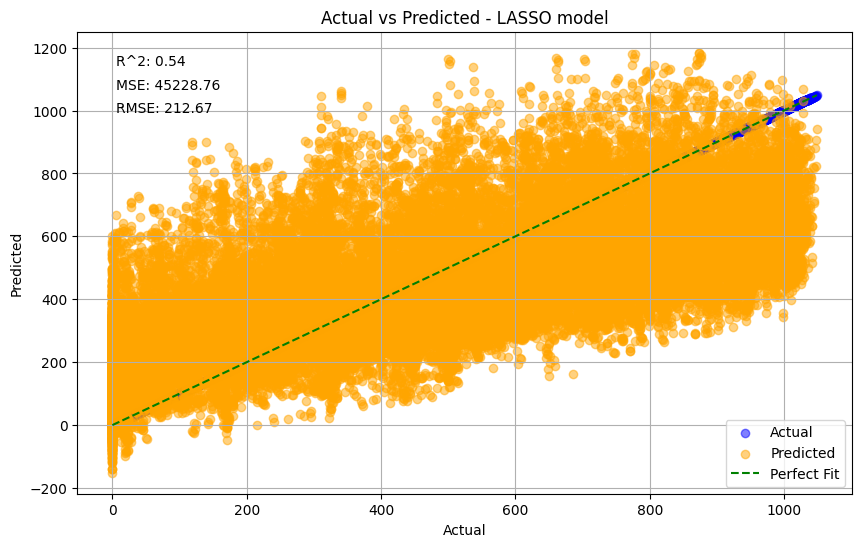

In [ ]:
# Actual vs predicted plot for LASSO tuned model
plot_actual_vs_predicted(y_test, lasso_y_pred, 'Actual vs Predicted - LASSO model')

**Saving the Lasso model**

In [ ]:
Pkl_Filename = "Pickle_lasso_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(lasso_model, file)
with open(Pkl_Filename, 'rb') as file:
    Pickled_lasso_Model = pickle.load(file)

Pickled_lasso_Model

Lasso(alpha=100)


### Modeling - L2 regularization i.e. Ridge regression

In [ ]:
# Defining a range of alpha values to search
alphas_ridge = [0.01, 0.1, 1, 10, 100]

best_ridge_alpha = None
best_ridge_rmse = float('inf')

# Iterating over each alpha value and fitting a Ridge Regression model
for alpha in alphas_ridge:
    # Initializing and training a Ridge Regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Making predictions on the testing set
    ridge_y_pred = ridge_model.predict(X_test)

    # Evaluating the model
    ridge_rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)

    # Updating best alpha and RMSE if current RMSE is better
    if ridge_rmse < best_ridge_rmse:
        best_ridge_rmse = ridge_rmse
        best_ridge_alpha = alpha


# Calculating evaluation metrics of the model
best_ridge_mse = mean_squared_error(y_test, ridge_y_pred)
best_ridge_rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)
best_ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
best_ridge_mape = mean_absolute_percentage_error(y_test, ridge_y_pred)
best_ridge_medae = median_absolute_error(y_test, ridge_y_pred)
best_ridge_r2 = r2_score(y_test, ridge_y_pred)

print("Best Ridge Regression (Alpha {})".format(best_ridge_alpha))
#print("Root Mean Squared Error (RMSE) of Ridge model:", best_ridge_rmse)

print("Mean Squared Error (MSE) of L2/Ridge Regression tuned model:", best_ridge_mse)
print("Root Mean Squared Error (RMSE) of L2/Ridge Regression tuned model:", best_ridge_rmse)
print("Mean Absolute Error (MAE) of L2/Ridge Regression tuned model:", best_ridge_mae)
print("Mean Absolute Percentage Error (MAPE) of  L2/Ridge Regressionregression:", best_ridge_mape)
print("Median Absolute Error (MedAE) of L2/Ridge Regressionregression:", best_ridge_medae)
print("R-squared (R²) of L2/Ridge Regression tuned model:", best_ridge_r2)

Best Ridge Regression (Alpha 0.01)
Mean Squared Error (MSE) of L2/Ridge Regression tuned model: 19481.622630326834
Root Mean Squared Error (RMSE) of L2/Ridge Regression tuned model: 139.5765833882132
Mean Absolute Error (MAE) of L2/Ridge Regression tuned model: 111.83953490566027
Mean Absolute Percentage Error (MAPE) of  L2/Ridge Regressionregression: 3.679994499932301e+16
Median Absolute Error (MedAE) of L2/Ridge Regressionregression: 96.36387272196043
R-squared (R²) of L2/Ridge Regression tuned model: 0.8032134264796478


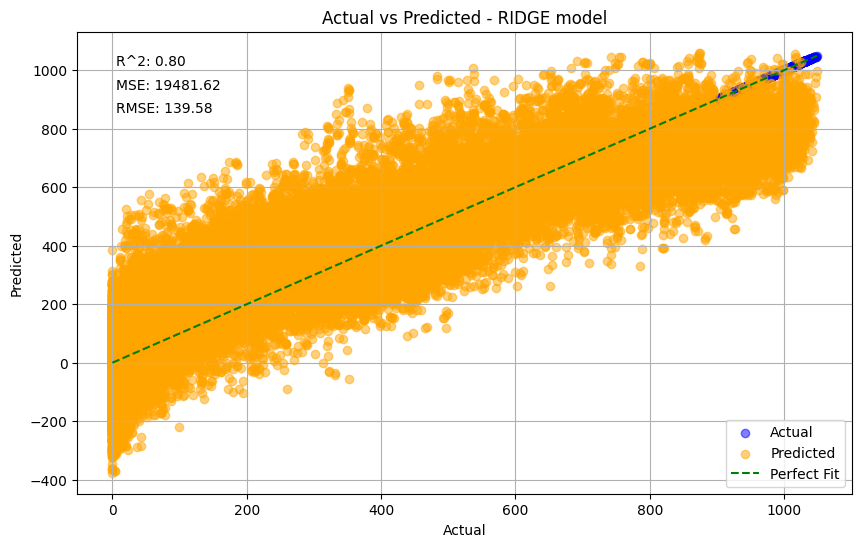

In [ ]:
# Actual vs predicted plot for RIDGE tuned model
plot_actual_vs_predicted(y_test, ridge_y_pred, 'Actual vs Predicted - RIDGE model')

**Saving the Ridge model**

In [ ]:
Pkl_Filename = "Pickle_ridge_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(ridge_model, file)
with open(Pkl_Filename, 'rb') as file:
    Pickled_ridge_Model = pickle.load(file)

Pickled_ridge_Model

Ridge(alpha=100)

Modeling - model comparsion

In [ ]:
# Creating a dictionary to store the evaluation metrics for each model
regression_evaluation_metrics = {
    'Linear Regression': {'MSE': mlr_mse, 'RMSE': mlr_rmse, 'MAE': mlr_mae, 'MAPE': mlr_mape, 'MEDAE': mlr_medae, 'R²': mlr_r2},
    'Random Forest Regression base model': {'MSE': rf_mse, 'RMSE': rf_rmse, 'MAE': rf_mae,'MAPE': rf_mape, 'MSLE': rf_msle, 'MEDAE': rf_medae, 'R²': rf_r2},
    'Random Forest Regression tuned model': {'MSE': best_rf_mse, 'RMSE': best_rf_rmse, 'MAE': best_rf_mae,'MAPE': best_rf_mape, 'MSLE': best_rf_msle, 'MEDAE': best_rf_medae, 'R²': best_rf_r2},
    'Support Vector Machine (SVM) Regression base model': {'MSE': svm_mse, 'RMSE': svm_rmse, 'MAE': svm_mae,'MAPE': svm_mape, 'MSLE': svm_msle, 'MEDAE': svm_medae, 'R²': svm_r2},
    'XGboost Regression base model': {'MSE': xgb_mse, 'RMSE': xgb_rmse, 'MAE': xgb_mae,'MAPE': xgb_mape, 'MEDAE': xgb_medae, 'R²': xgb_r2},
    'XGboost Regression tuned model': {'MSE': best_xgb_mse, 'RMSE': best_xgb_rmse, 'MAE': best_xgb_mae,'MAPE': best_xgb_mape, 'MEDAE': best_xgb_medae, 'R²': best_xgb_r2},
    'SVM Regression tuned model': {'MSE': best_svm_mse, 'RMSE': best_svm_rmse, 'MAE': best_svm_mae,'MAPE': best_svm_mape, 'MSLE': best_svm_msle, 'MEDAE': best_svm_medae, 'R²': best_svm_r2},
    'L1/Lasso Regression tuned model': {'MSE': best_lasso_mse, 'RMSE': best_lasso_rmse, 'MAE': best_lasso_mae,'MAPE': best_lasso_mape, 'MEDAE': best_lasso_medae, 'R²': best_lasso_r2},
    'L2/Ridge Regression tuned model': {'MSE': best_ridge_mse, 'RMSE': best_ridge_rmse, 'MAE': best_ridge_mae,'MAPE': best_ridge_mape, 'MEDAE': best_ridge_medae, 'R²': best_ridge_r2},
}

# Converting the dictionary to a DataFrame for better visualization
evaluation_metrics_df = pd.DataFrame.from_dict(regression_evaluation_metrics, orient='index')

# Printing the df
print("Performance Comparison of Different Models:")
evaluation_metrics_df

Performance Comparison of Different Models:


MSE        RMSE  \
Linear Regression                                   19474.732652  139.551899   
Random Forest Regression base model                   521.157979   22.828885   
Random Forest Regression tuned model                 2907.104170   53.917568   
Support Vector Machine (SVM) Regression base model  98749.695207  314.244642   
XGboost Regression base model                        1119.118371   33.453227   
XGboost Regression tuned model                        675.453312   25.989485   
SVM Regression tuned model                          19689.747203  140.320160   
L1/Lasso Regression tuned model                     45228.762667  212.670550   
L2/Ridge Regression tuned model                     19481.622630  139.576583   

                                                           MAE          MAPE  \
Linear Regression                                   111.841941  3.691775e+16   
Random Forest Regression base model                   8.757994  8.237318e+13   
Random Forest Regression tuned model                 32.649766  3.469817e+14   
Support Vector Machine (SVM) Regression base model  271.266114  1.635910e+17   
XGboost Regression base model                        20.230367  3.184748e+15   
XGboost Regression tuned model                       14.242414  2.055217e+15   
SVM Regression tuned model                          111.403961  1.635910e+17   
L1/Lasso Regression tuned model                     174.465367  3.691775e+16   
L2/Ridge Regression tuned model                     111.839535  3.679994e+16   

                                                         MEDAE        R²  \
Linear Regression                                    96.360689  0.803283   
Random Forest Regression base model                   1.580000  0.994736   
Random Forest Regression tuned model                 16.922048  0.970635   
Support Vector Machine (SVM) Regression base model  273.715909  0.002516   
XGboost Regression base model                        11.804981  0.988696   
XGboost Regression tuned model                        7.579788  0.993177   
SVM Regression tuned model                          273.715909  0.801111   
L1/Lasso Regression tuned model                     154.582270  0.543138   
L2/Ridge Regression tuned model                      96.363873  0.803213   

                                                        MSLE  
Linear Regression                                        NaN  
Random Forest Regression base model                 0.022253  
Random Forest Regression tuned model                0.091734  
Support Vector Machine (SVM) Regression base model  4.582873  
XGboost Regression base model                            NaN  
XGboost Regression tuned model                           NaN  
SVM Regression tuned model                          4.582873  
L1/Lasso Regression tuned model                          NaN  
L2/Ridge Regression tuned model                          NaN

In [ ]:
# Consolidation and comparison of all modeling predictions

# Combining y_test and X_test into a single DataFrame
consolidated_test_modelpred_df = pd.DataFrame(X_test)
consolidated_test_modelpred_df['Actual y'] = y_test

# Adding predicted values from different models
consolidated_test_modelpred_df['Linear regression predicted y'] = mlr_y_pred
consolidated_test_modelpred_df['Random forest base predicted y'] = rf_y_pred
consolidated_test_modelpred_df['Random forest tuned predicted y'] = best_rf_y_pred
consolidated_test_modelpred_df['XGBoost base predicted y'] = xgb_y_pred
consolidated_test_modelpred_df['XGBoost tuned predicted y'] = best_xgb_y_pred
consolidated_test_modelpred_df['SVM base predicted y'] = svm_y_pred
consolidated_test_modelpred_df['SVM tuned predicted y'] = best_svm_y_pred
consolidated_test_modelpred_df['Lasso predicted y'] = lasso_y_pred
consolidated_test_modelpred_df['Ridge predicted y'] = ridge_y_pred


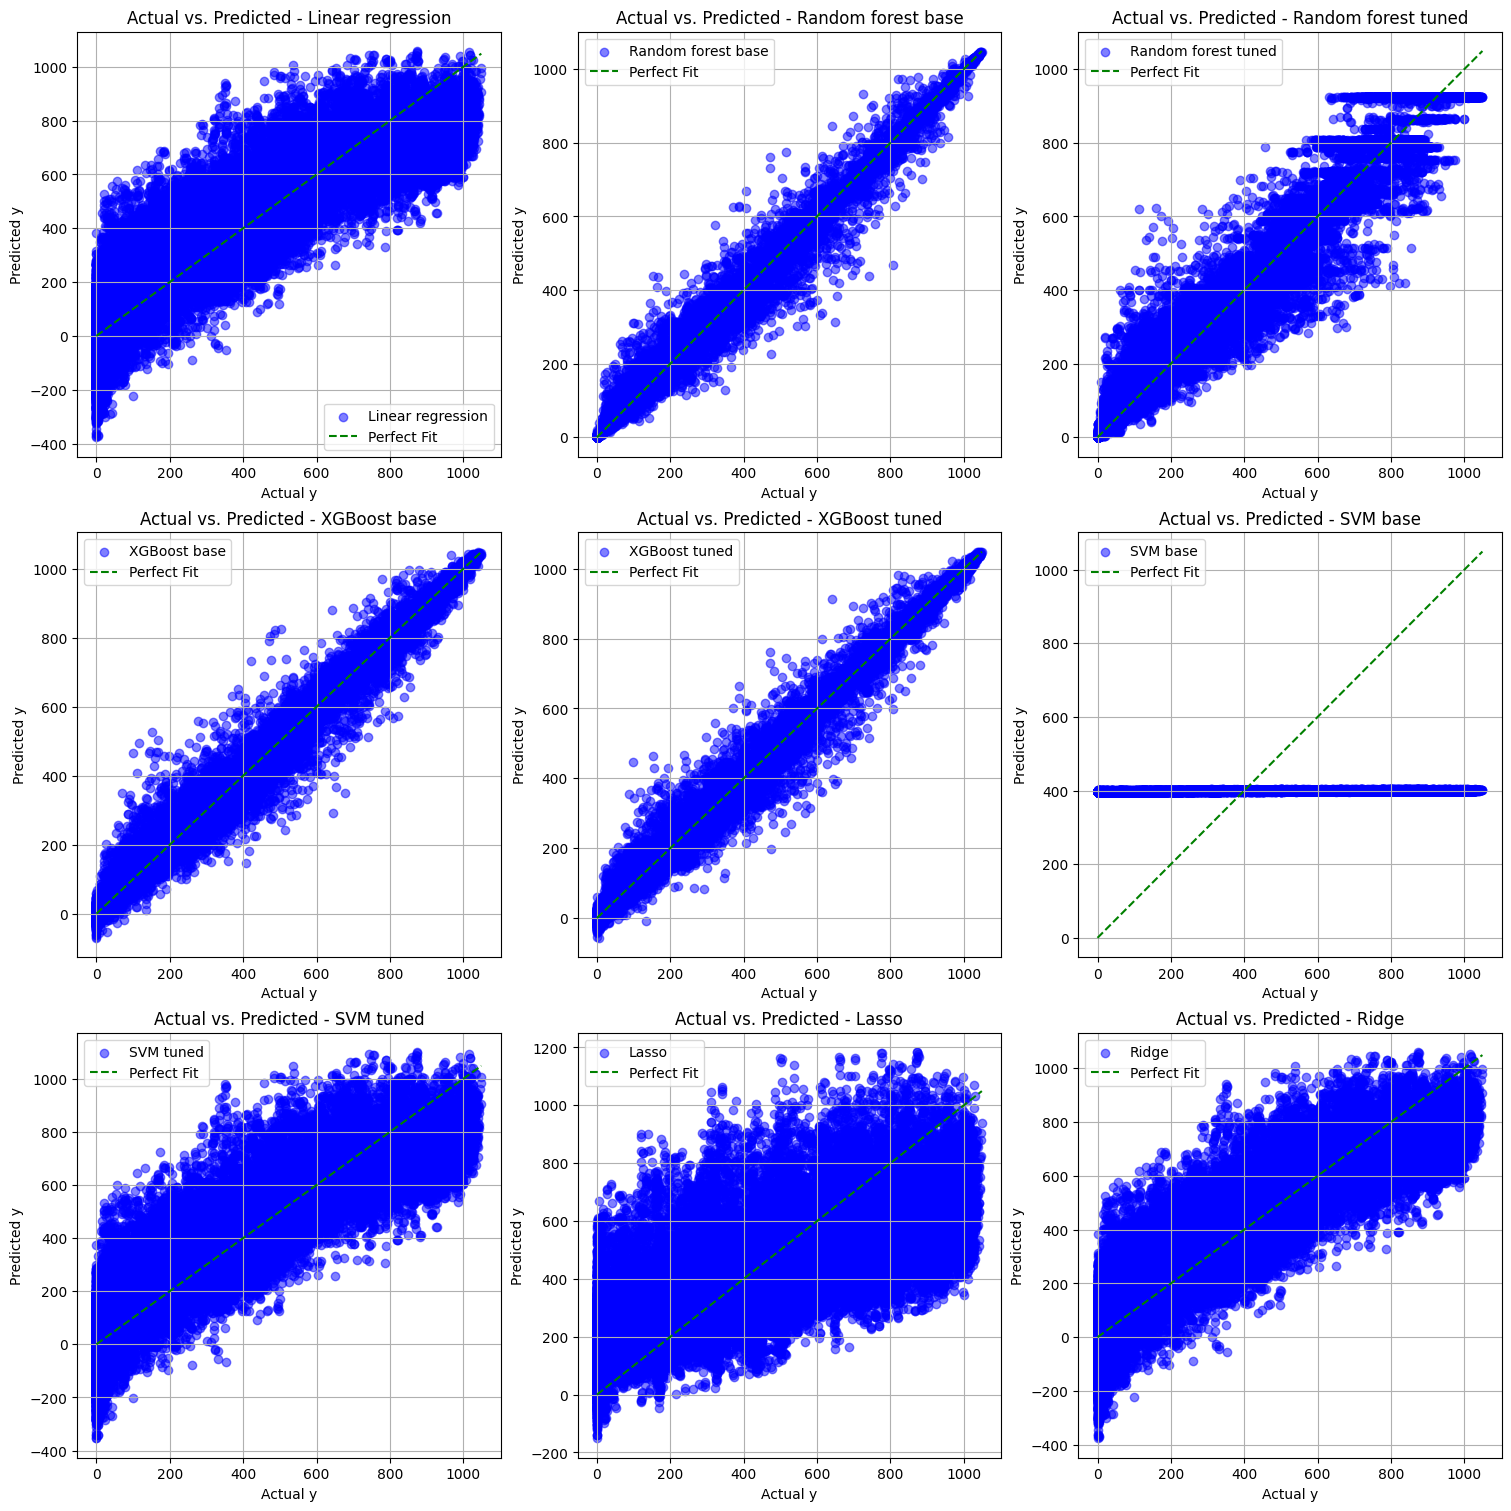

In [ ]:
# Pair plot visualization
import matplotlib.pyplot as plt

# Defining the list of models
model_names = [
    'Linear regression',
    'Random forest base',
    'Random forest tuned',
    'XGBoost base',
    'XGBoost tuned',
    'SVM base',
    'SVM tuned',
    'Lasso',
    'Ridge'
]

# Creating subplots for each model
num_models = len(model_names)
num_cols = 3  # Number of columns in the subplot grid
num_rows = -(-num_models // num_cols)  # Ceiling division to calculate number of rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows), constrained_layout=True)

# Flattening the axes if more than one row
if num_rows > 1:
    axes = axes.flatten()

# Looping through each model and plot actual vs. predicted values
for i, model_name in enumerate(model_names):
    ax = axes[i]
    ax.scatter(consolidated_test_modelpred_df['Actual y'], consolidated_test_modelpred_df[f'{model_name} predicted y'], label=model_name, color='blue', alpha=0.5)
    ax.plot([consolidated_test_modelpred_df['Actual y'].min(), consolidated_test_modelpred_df['Actual y'].max()], [consolidated_test_modelpred_df['Actual y'].min(), consolidated_test_modelpred_df['Actual y'].max()], color='green', linestyle='--', label='Perfect Fit')
    ax.set_xlabel('Actual y')
    ax.set_ylabel('Predicted y')
    ax.set_title(f'Actual vs. Predicted - {model_name}')
    ax.legend()
    ax.grid(True)

# Removing empty subplots if num_models is not a multiple of num_cols
if num_models % num_cols != 0:
    for i in range(num_models % num_cols, num_cols):
        fig.delaxes(axes[-(i+1)])

plt.show()


### Modeling - feature importance and explainability
#### Feature importance of Linear regression

In [ ]:
# Extracting coefficients from the trained linear regression model
lr_coefficients = mlr_model.coef_

# Creating a DataFrame to store feature names and their coefficients
lr_coefficients_df = pd.DataFrame({'Feature': X.columns, 'LR coefficient': lr_coefficients})

# Sorting the DataFrame by absolute coefficient value in descending order
lr_coefficients_df['Absolute_Coefficient'] = lr_coefficients_df['LR coefficient'].abs()
lr_coefficients_df = lr_coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Printing or visualizing the feature importance
print("Feature Importance (Linear Regression):")
print(lr_coefficients_df)

Feature Importance (Linear Regression):
                        Feature  LR coefficient  Absolute_Coefficient
31        hour_day_part_morning      160.119603            160.119603
30        hour_day_part_evening     -142.694388            142.694388
29  hour_day_part_early_morning     -139.472547            139.472547
28      hour_day_part_afternoon      122.047331            122.047331
9                  Cloud Type_0      117.862663            117.862663
17                 Cloud Type_9      -74.610637             74.610637
10                 Cloud Type_2       70.119950             70.119950
11                 Cloud Type_3      -59.488649             59.488649
8                    Wind Speed       58.011372             58.011372
23                zipcode_95124       53.277623             53.277623
22                zipcode_95123       41.326500             41.326500
12                 Cloud Type_4      -41.136178             41.136178
14                 Cloud Type_6      -36.378266   

In [ ]:
# Fitting the multiple linear regression model
mlr_model_ols = sm.OLS(y, sm.add_constant(X)).fit()

# Extracting coefficients and p-values from the trained linear regression model
lr_coefficients_ols = mlr_model_ols.params
lr_pvalues_ols = mlr_model_ols.pvalues

# Creating a DataFrame to store feature names, coefficients, and p-values
lr_summary_ols_df = pd.DataFrame({'Feature': ['Intercept'] + list(X.columns),
                              'Coefficient': lr_coefficients_ols,
                              'P-value': lr_pvalues_ols})

# Sorting the DataFrame by absolute coefficient value in descending order
lr_summary_ols_df['Absolute_Coefficient'] = lr_summary_ols_df['Coefficient'].abs()
lr_summary_ols_df = lr_summary_ols_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Printing or visualizing the feature importance
print("Feature Importance (Linear Regression):")
print(lr_summary_ols_df)

# Optional
# Filtering out features with p-value > 0.05 since they're not significant
lr_summary_ols_df_filtered = lr_summary_ols_df[lr_summary_ols_df['P-value'] <= 0.05]
print("\nSignificant Features (p-value <= 0.05):")
print(lr_summary_ols_df_filtered[['Feature', 'Coefficient', 'P-value']])


Feature Importance (Linear Regression):
                                                 Feature   Coefficient  \
const                                          Intercept -19587.859895   
hour_day_part_evening              hour_day_part_evening  -5041.046574   
hour_day_part_early_morning  hour_day_part_early_morning  -5035.561941   
hour_day_part_afternoon          hour_day_part_afternoon  -4774.940475   
hour_day_part_morning              hour_day_part_morning  -4736.310906   
Cloud Type_9                                Cloud Type_9  -2261.044876   
Cloud Type_3                                Cloud Type_3  -2236.592994   
Cloud Type_4                                Cloud Type_4  -2216.079374   
Cloud Type_6                                Cloud Type_6  -2211.840184   
Cloud Type_5                                Cloud Type_5  -2185.209804   
Cloud Type_8                                Cloud Type_8  -2167.925805   
Cloud Type_7                                Cloud Type_7  -2144.493289  

Text(0, 0.5, 'Feature')

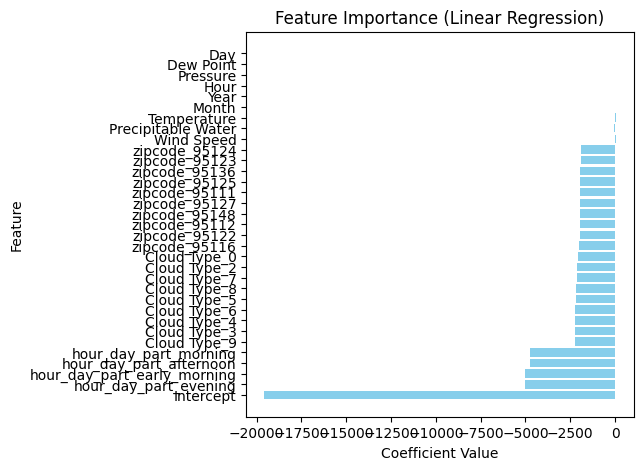

In [ ]:
# Setting up the figure and axes
plt.figure(figsize=(5,5))

# Plotting feature importance from Linear Regression
plt.barh(y=lr_summary_ols_df['Feature'], width=lr_summary_ols_df['Coefficient'], color='skyblue')
plt.title('Feature Importance (Linear Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

Actual vs predicted values

#### Feature importance of Random Forest

In [ ]:
# Extracting feature importance from the tuned RF model
rf_feature_importance = best_rf_model.feature_importances_ #changed best_rf_model to best_model

# Creating a DataFrame to store feature names and their importance scores
rf_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance from RF': rf_feature_importance})

# Sorting the DataFrame by importance score in descending order
rf_importance_df = rf_importance_df.sort_values(by='Importance from RF', ascending=False)

# Printing or visualizing the feature importance
print("Feature Importance (Random Forest):")
print(rf_importance_df)

Feature Importance (Random Forest):
                        Feature  Importance from RF
4                   Temperature        4.378865e-01
3                          Hour        2.750793e-01
1                         Month        1.225088e-01
30        hour_day_part_evening        5.760524e-02
9                  Cloud Type_0        4.912705e-02
29  hour_day_part_early_morning        3.810416e-02
8                    Wind Speed        4.745500e-03
2                           Day        2.565931e-03
7            Precipitable Water        2.305837e-03
5                     Dew Point        2.070547e-03
31        hour_day_part_morning        1.728366e-03
12                 Cloud Type_4        1.692452e-03
15                 Cloud Type_7        1.502085e-03
11                 Cloud Type_3        8.277715e-04
10                 Cloud Type_2        7.733802e-04
0                          Year        6.150576e-04
28      hour_day_part_afternoon        3.404695e-04
6                      Press

In [ ]:
# Extracting feature importance from the tuned XGB model
xgb_feature_importance = best_xgb_model.feature_importances_

# Creating a DataFrame to store feature names and their importance scores
xgb_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance from XGBoost': xgb_feature_importance})

# Sorting the DataFrame by importance score in descending order
xgb_importance_df = xgb_importance_df.sort_values(by='Importance from XGBoost', ascending=False)

# Printing or visualizing the feature importance
print("Feature Importance (XGBoost):")
print(xgb_importance_df)

Feature Importance (XGBoost):
                        Feature  Importance from XGBoost
3                          Hour                 0.280824
4                   Temperature                 0.238169
9                  Cloud Type_0                 0.183323
1                         Month                 0.134141
28      hour_day_part_afternoon                 0.033947
31        hour_day_part_morning                 0.032285
12                 Cloud Type_4                 0.014240
10                 Cloud Type_2                 0.010192
15                 Cloud Type_7                 0.009432
14                 Cloud Type_6                 0.009001
17                 Cloud Type_9                 0.008713
8                    Wind Speed                 0.007247
7            Precipitable Water                 0.006747
11                 Cloud Type_3                 0.005601
5                     Dew Point                 0.005282
2                           Day                 0.004160
0

Feature Importance for Random Forest and XGboost

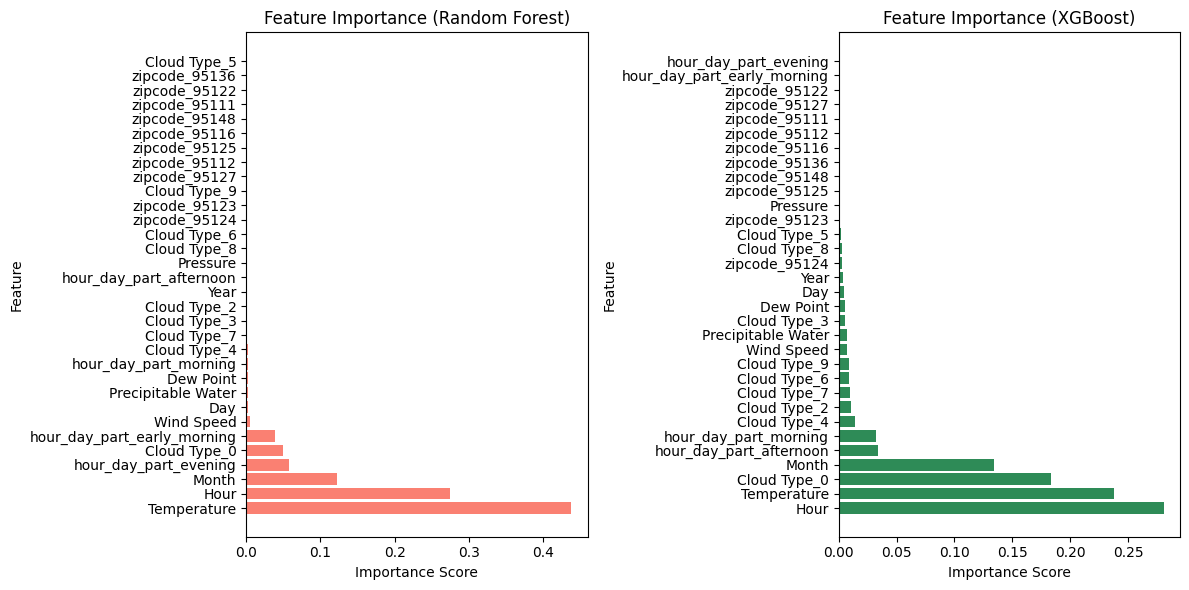

In [ ]:
# Setting the size for the plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Plotting feature importance from Random Forest
axes[0].barh(y=rf_importance_df['Feature'], width=rf_importance_df['Importance from RF'], color='salmon')
axes[0].set_title('Feature Importance (Random Forest)')
axes[0].set_xlabel('Importance Score')
axes[0].set_ylabel('Feature')

# Plotting feature importance from Random Forest
axes[1].barh(y=xgb_importance_df['Feature'], width=xgb_importance_df['Importance from XGBoost'], color='seagreen')
axes[1].set_title('Feature Importance (XGBoost)')
axes[1].set_xlabel('Importance Score')
axes[1].set_ylabel('Feature')

# Adjusting layout
plt.tight_layout()

# Showing plot
plt.show()

Time of the day is the most important feature in predicting irradiance

## Irradiance to electricity calculation

<ipython-input-121-fbf69974fc14>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_for_estimation.drop (columns=['GHI'], inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
<ipython-input-121-fbf69974fc14>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_for_estimation['Predicted Irradiance'] = predicted_irradiance


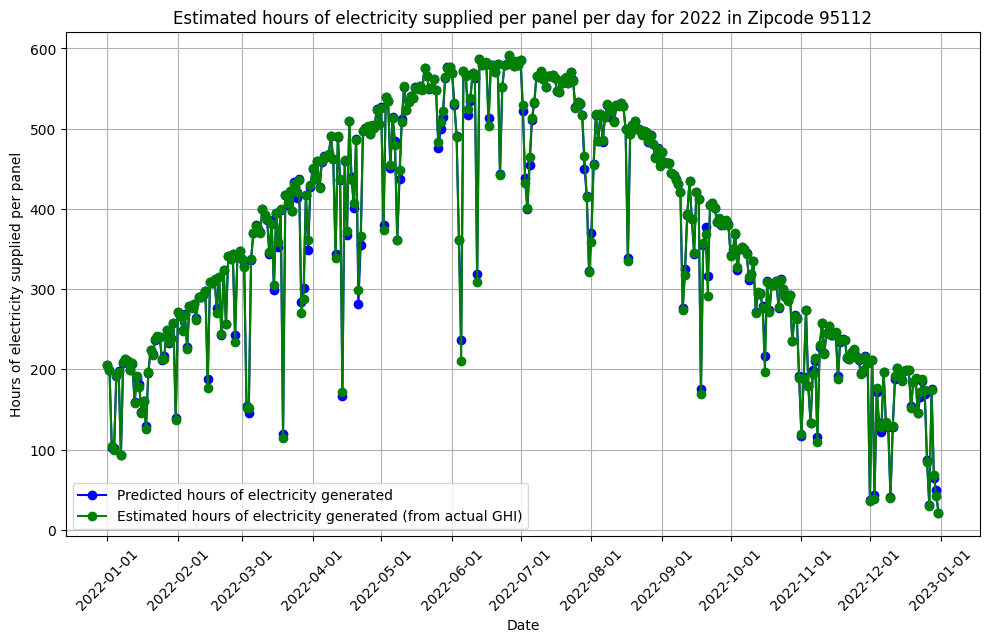

In [ ]:
# Simulation of electricity for streetlights
# Defining constants
panel_area = 0.4  # m² # typical average size of a panel for a streetlight
panel_efficiency = 0.20  # 20%
# Defining the average power consumption of the streetlight per day
streetlight_power_consumption_kwh_per_day = 1.2  # kWh

# Specifying the year filter
year_to_filter = 2022

# Step 1: Filtering data for the specified year and zipcode
filtered_data_for_estimation = modeling_df[(modeling_df['zipcode_95112'] == 1) & (modeling_df['Year'] == year_to_filter)]

# Step 2: Calculating the actual energy generated by Month and Day
actual_irradiance_per_day = filtered_data_for_estimation.groupby(['Year','Month', 'Day'])['GHI'].sum()
actual_energy_generation_kwh_per_panel = actual_irradiance_per_day * panel_area * panel_efficiency
actual_hours_of_electricity_supplied_per_panel = actual_energy_generation_kwh_per_panel / streetlight_power_consumption_kwh_per_day
# Convert to dataframe
actual_hours_of_electricity_supplied_per_panel = actual_hours_of_electricity_supplied_per_panel.reset_index()
actual_hours_of_electricity_supplied_per_panel['Date'] = pd.to_datetime(actual_hours_of_electricity_supplied_per_panel[['Year', 'Month', 'Day']])
actual_hours_of_electricity_supplied_per_panel.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# Renaming column
actual_hours_of_electricity_supplied_per_panel.rename(columns={'GHI': 'Actual hours of electrcity per panel'}, inplace=True)

# Step 3: Dropping GHI since it's the target before we predict on this
filtered_data_for_estimation.drop (columns=['GHI'], inplace=True)

# Step 4: Recreating df with features for scoring the model
df_with_features_filter = filtered_data_for_estimation.values

# Step 5: Predicting irradiance for each day in the filtered scoring dataset
#predicted_irradiance = mlr_model.predict(df_with_features_filter)  # using linear regression model
predicted_irradiance = rf_model.predict(df_with_features_filter)  # using RF model as it is the best model

# Step 6: Adding predicted irradiance back to the filtered data
filtered_data_for_estimation['Predicted Irradiance'] = predicted_irradiance

# Step 7: Grouping by Month and Day and summing up the predicted irradiance for each day
predicted_irradiance_per_day = filtered_data_for_estimation.groupby(['Year','Month', 'Day'])['Predicted Irradiance'].sum()

# Step 8: Converting the predicted irradiance to kilowatt-hours (kWh)
predicted_energy_generation_kwh_per_panel = predicted_irradiance_per_day * panel_area * panel_efficiency
# Step 9: Convert predicted electricity generation to hours for 1.2 kWh requirement
predicted_hours_of_electricity_supplied_per_panel = predicted_energy_generation_kwh_per_panel / streetlight_power_consumption_kwh_per_day
# Convert to dataframe
predicted_hours_of_electricity_supplied_per_panel = predicted_hours_of_electricity_supplied_per_panel.reset_index()
predicted_hours_of_electricity_supplied_per_panel['Date'] = pd.to_datetime(predicted_hours_of_electricity_supplied_per_panel[['Year', 'Month', 'Day']])
predicted_hours_of_electricity_supplied_per_panel.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# Renaming column
predicted_hours_of_electricity_supplied_per_panel.rename(columns={'Predicted Irradiance': 'Predicted hours of electrcity per panel'}, inplace=True)

import matplotlib.dates as mdates

# Step 10: Plotting the results by Date
plt.figure(figsize=(10, 6))
plt.plot(predicted_hours_of_electricity_supplied_per_panel['Date'],
         predicted_hours_of_electricity_supplied_per_panel['Predicted hours of electrcity per panel'], marker='o', linestyle='-', color='b', label='Predicted hours of electricity generated')
plt.plot(actual_hours_of_electricity_supplied_per_panel['Date'],
         actual_hours_of_electricity_supplied_per_panel['Actual hours of electrcity per panel'], marker='o', linestyle='-', color='g', label='Estimated hours of electricity generated (from actual GHI)')
plt.xlabel('Date')
plt.ylabel('Hours of electricity supplied per panel')
plt.title(f'Estimated hours of electricity supplied per panel per day for {year_to_filter} in Zipcode 95112')
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjusting layout to prevent clipping of labels

# Setting x-axis ticks to show all dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability

plt.show()

## Validation of the model to check for whether it generalizes well: in-sample, out-of-sample and out-of-time validation

In-sample validation:
In-sample validation involves assessing the performance of the model on the same dataset that was used for training.

The model learns from the entire dataset during training, and its performance is evaluated using the same dataset or a subset of the same dataset.

While in-sample validation can provide insights into how well the model fits the training data, it may not accurately reflect how the model will perform on new, unseen data.

Out-of-sample validation:
Out-of-sample validation involves evaluating the model's performance on a dataset that it has not seen during training.

The dataset used for out-of-sample validation is typically held out from the training process and reserved solely for evaluation purposes.

By evaluating the model on unseen data, out-of-sample validation provides a more realistic assessment of the model's generalization performance and ability to make predictions on new data. This is already being done since we're splitting out the test data and calculating the evaluation metrics against test. A variation is to do this for a different zipcode not considered as part of the 10 that were filtered.

Out-of-Time validation:
Out-of-time validation is a specific form of out-of-sample validation where the evaluation dataset comes from a different time period than the training dataset.

This approach is particularly useful for time series data, where the model's ability to generalize across different time periods is important.

By evaluating the model on data from a different time period, out-of-time validation helps assess the model's robustness to temporal variations and its ability to make accurate predictions in real-world scenarios. For out of time validation, we need to compare the predictions vs an unseen time period between 2016-2019. A consistent performance will ensure that the model is generalizing across different timeframes.

In [ ]:
# Dataset for in-sample validation

# Combining the training data
train_data_insample = pd.concat([X_train, y_train], axis=1)

# In sample validation will be done on a 10k random sample of the training data
sampled_train_data = train_data_insample.sample(n=10000, random_state=123)

# Separating X_train_sampled and y_train_sampled for validation
X_train_sampled = sampled_train_data.drop(columns=['GHI'])
y_train_sampled = sampled_train_data['GHI']

In [ ]:
# Making predictions on the sampled training data using existing models
lr_pred_train_sampled = mlr_model.predict(X_train_sampled)
rf_pred_train_sampled = rf_model.predict(X_train_sampled)
xgb_pred_train_sampled = xgb_model.predict(X_train_sampled)
svm_pred_train_sampled = svm_model.predict(X_train_sampled)
lasso_pred_train_sampled = lasso_model.predict(X_train_sampled)
ridge_pred_train_sampled = ridge_model.predict(X_train_sampled)

# Calculating evaluation metrics (MSE) for each model
mse_lr_insample_val = mean_squared_error(y_train_sampled, lr_pred_train_sampled)
mse_rf_insample_val = mean_squared_error(y_train_sampled, rf_pred_train_sampled)
mse_xgb_insample_val = mean_squared_error(y_train_sampled, xgb_pred_train_sampled)
mse_svm_insample_val = mean_squared_error(y_train_sampled, svm_pred_train_sampled)
mse_lasso_insample_val = mean_squared_error(y_train_sampled, lasso_pred_train_sampled)
mse_ridge_insample_val = mean_squared_error(y_train_sampled, ridge_pred_train_sampled)

# Calculating evaluation metrics (MSE) for each model
r2_lr_insample_val = r2_score(y_train_sampled, lr_pred_train_sampled)
r2_rf_insample_val = r2_score(y_train_sampled, rf_pred_train_sampled)
r2_xgb_insample_val = r2_score(y_train_sampled, xgb_pred_train_sampled)
r2_svm_insample_val = r2_score(y_train_sampled, svm_pred_train_sampled)
r2_lasso_insample_val = r2_score(y_train_sampled, lasso_pred_train_sampled)
r2_ridge_insample_val = r2_score(y_train_sampled, ridge_pred_train_sampled)

print("In-sample MSE for Linear regressionn:", mse_lr_insample_val)
print("In-sample MSE for Random Forest regression:", mse_rf_insample_val)
print("In-sample MSE for XGB regression:", mse_lr_insample_val)
print("In-sample MSE for SVM regression:", mse_rf_insample_val)
print("In-sample MSE for lasso regression:", mse_lasso_insample_val)
print("In-sample MSE for ridge regression:", mse_ridge_insample_val)

print("In-sample rsqaured for Linear regressionn:", r2_lr_insample_val)
print("In-sample rsqaured for Random Forest regression:", r2_rf_insample_val)
print("In-sample rsqaured for XGB regression:", r2_lr_insample_val)
print("In-sample rsqaured for SVM regression:", r2_rf_insample_val)
print("In-sample rsqaured for lasso regression:", r2_lasso_insample_val)
print("In-sample rsqaured for ridge regression:", r2_ridge_insample_val)

In-sample MSE for Linear regressionn: 19421.315186295844
In-sample MSE for Random Forest regression: 73.37782341
In-sample MSE for XGB regression: 19421.315186295844
In-sample MSE for SVM regression: 73.37782341
In-sample MSE for lasso regression: 44408.571938134155
In-sample MSE for ridge regression: 19424.823907630256
In-sample rsqaured for Linear regressionn: 0.805100879530518
In-sample rsqaured for Random Forest regression: 0.9992636300318803
In-sample rsqaured for XGB regression: 0.805100879530518
In-sample rsqaured for SVM regression: 0.9992636300318803
In-sample rsqaured for lasso regression: 0.5543457521272616
In-sample rsqaured for ridge regression: 0.8050656683877354


### Linear Regression, L1/Lasso Regression, L2/Ridge regression,Random forest are stable models.
### XGboost and  SVM are overfitting.

### Testing on out of time (unseen) data. To check if our models is overfitting

In [ ]:

# File path to the Solar Irradiance processed data stored in Google Drive
file_path = '/content/drive/Shareddrives/DATA245_Project/SolarIrradiance_processed.csv'
# Reading the Solar Irradiance processed data from the specified file path into a pandas DataFrame
solar_ir_df_oot = pd.read_csv(file_path)
# The specified zip codes account for >50% of San Jose population
san_jose_zipcodes_filter = [95123,95127,95111,95122,95125,95116,95112,95124,95148,95136]
# Filtering the data for the top 10 zipcodes
solar_ir_df_zip_filter_oot = solar_ir_df_oot[solar_ir_df_oot['zipcode'].isin(san_jose_zipcodes_filter)]
# Filtering data for 2019
solar_ir_df_zip_filter_year_oot = solar_ir_df_zip_filter_oot[solar_ir_df_zip_filter_oot['Year'] == 2019]
# Defining the hour_day_part values to remove
darkvalues_to_remove = ['early_night', 'late_evening', 'late_night', 'late_night_start_of_day']
# Filtering out rows with the specified hour_day_part values
solar_ir_df_nondark_oot = solar_ir_df_zip_filter_year_oot[~solar_ir_df_zip_filter_year_oot['hour_day_part'].isin(darkvalues_to_remove)]
# Droping the minute column as it is a constant accross the data
solar_ir_df_nondark_oot = solar_ir_df_nondark_oot.drop(columns=['Minute'])
# 1-hot encoding for multiple columns
# Specifying the list of columns to one-hot encode
columns_to_encode_oot = ['Cloud Type','zipcode', 'hour_day_part']
# Perform one-hot encoding for multiple columns and ensure numeric encoding instead of boolean
solar_ir_df_nondark_encoded_oot = pd.get_dummies(solar_ir_df_nondark_oot, columns=columns_to_encode_oot, prefix=columns_to_encode, dtype='int')
# Dropping the "Clearsky GHI","Clearsky DHI","Clearsky DNI","DHI", 'Solar Zenith Angle'
columns_to_drop = ["Clearsky GHI", "Clearsky DHI", "Clearsky DNI", "DHI", "DNI", "Solar Zenith Angle","Relative Humidity"]
solar_ir_df_nondark_encoded_oot.drop(columns=columns_to_drop, inplace=True)
modeling_df_oot= solar_ir_df_nondark_encoded_oot.copy()
# Creating dummy cloumn for cloud_type_5 as it is missing in 2018 and 2019 data
modeling_df_oot.insert(loc=14, column='Cloud Type_5', value=0)
# Separating features (X) and target variable (y)
X_oot = modeling_df_oot.drop(columns=['GHI'])
y_oot = modeling_df_oot['GHI']


### Predictions for LinearRegression Model

In [ ]:
mlr_y_pred_oot = mlr_model.predict(X_oot)

# Calculating evaluation metrics for linear regression
mlr_mse_oot = mean_squared_error(y_oot, mlr_y_pred_oot)
mlr_rmse_oot = mean_squared_error(y_oot, mlr_y_pred_oot, squared=False)  # RMSE
mlr_mae_oot = mean_absolute_error(y_oot, mlr_y_pred_oot)
mlr_mape_oot = mean_absolute_percentage_error(y_oot, mlr_y_pred_oot)
#mlr_msle = mean_squared_log_error(y_test, mlr_y_pred)
mlr_medae_oot = median_absolute_error(y_oot, mlr_y_pred_oot)
mlr_r2_oot = r2_score(y_oot, mlr_y_pred_oot)

print("Mean Squared Error (MSE) of  linear regression for out of time validation:", mlr_mse_oot)
print("Root Mean Squared Error (RMSE) of linear regression for out of time validation:", mlr_rmse_oot)
print("Mean Absolute Error (MAE) of  linear regression for out of time validation:", mlr_mae_oot)
print("Mean Absolute Percentage Error (MAPE) of  linear regression for out of time validation:", mlr_mape_oot)
print("Median Absolute Error (MedAE) of  linear regression for out of time validation:", mlr_medae_oot)
print("R-squared (R²) of linear regression for out of time validation:", mlr_r2_oot)

Mean Squared Error (MSE) of  linear regression for out of time validation: 24921.570392021546
Root Mean Squared Error (RMSE) of linear regression for out of time validation: 157.86567198736256
Mean Absolute Error (MAE) of  linear regression for out of time validation: 125.98419154067496
Mean Absolute Percentage Error (MAPE) of  linear regression for out of time validation: 3.746422406299327e+16
Median Absolute Error (MedAE) of  linear regression for out of time validation: 106.7678082706152
R-squared (R²) of linear regression for out of time validation: 0.7513816907530227


### Predictions for RandomForest Model

In [ ]:
best_rf_y_pred_oot = best_rf_model.predict(X_oot)

# Calculating evaluation metrics of the model
best_rf_mse_oot = mean_squared_error(y_oot, best_rf_y_pred_oot)
best_rf_rmse_oot = mean_squared_error(y_oot, best_rf_y_pred_oot, squared=False)
best_rf_mae_oot = mean_absolute_error(y_oot, best_rf_y_pred_oot)
best_rf_mape_oot = mean_absolute_percentage_error(y_oot, best_rf_y_pred_oot)
best_rf_msle_oot = mean_squared_log_error(y_oot, best_rf_y_pred_oot)
best_rf_medae_oot = median_absolute_error(y_oot, best_rf_y_pred_oot)
best_rf_r2_oot = r2_score(y_oot, best_rf_y_pred_oot)

print("Tuned Random Forest Regression:")
#print("Best parameters after hyperparameter tuning of the RF model for out of time validation:", best_params_rf_oot)
print("Mean Squared Error (MSE) of Random Forest Regression tuned model for out of time validation:", best_rf_mse_oot)
print("Root Mean Squared Error (RMSE) of Random Forest Regression tuned model for out of time validation:", best_rf_rmse_oot)
print("Mean Absolute Error (MAE) of Random Forest Regression tuned model for out of time validation:", best_rf_mae_oot)
print("Mean Absolute Percentage Error (MAPE) of  linear regression for out of time validation:", best_rf_mape_oot)
print("Mean Squared logarithmic Error (MSLE) of  linear regression for out of time validation:", best_rf_msle_oot)
print("Median Absolute Error (MedAE) of  linear regression for out of time validation:", best_rf_medae_oot)
print("R-squared (R²) of Random Forest Regression tuned model for out of time validation:", best_rf_r2_oot)

Tuned Random Forest Regression:
Mean Squared Error (MSE) of Random Forest Regression tuned model for out of time validation: 4392.827806763715
Root Mean Squared Error (RMSE) of Random Forest Regression tuned model for out of time validation: 66.27841131743966
Mean Absolute Error (MAE) of Random Forest Regression tuned model for out of time validation: 41.07707093156615
Mean Absolute Percentage Error (MAPE) of  linear regression for out of time validation: 858548166610093.2
Mean Squared logarithmic Error (MSLE) of  linear regression for out of time validation: 0.2325903832289469
Median Absolute Error (MedAE) of  linear regression for out of time validation: 22.709466745469477
R-squared (R²) of Random Forest Regression tuned model for out of time validation: 0.9561770223564907


### Predictions for XGBoost Model

In [ ]:
xgb_y_pred_oot = xgb_model.predict(X_oot)

# Calculating evaluation metrics of the model
xgb_mse_oot = mean_squared_error(y_oot, xgb_y_pred_oot)
xgb_rmse_oot = mean_squared_error(y_oot, xgb_y_pred_oot, squared=False)
xgb_mae_oot = mean_absolute_error(y_oot, xgb_y_pred_oot)
xgb_mape_oot = mean_absolute_percentage_error(y_oot, xgb_y_pred_oot)
#xgb_msle = mean_squared_log_error(y_test_1, xgb_y_pred)
xgb_medae_oot = median_absolute_error(y_oot, xgb_y_pred_oot)
xgb_r2_oot = r2_score(y_oot, xgb_y_pred_oot)

print("Mean Squared Error (MSE) of XGBoost Regression base model for out of time validation:", xgb_mse_oot)
print("Root Mean Squared Error (RMSE) of XGBoost Regression base model for out of time validation:", xgb_rmse_oot)
print("Mean Absolute Error (MAE) of XGBoost Regression base model for out of time validation:", xgb_mae_oot)
print("Mean Absolute Percentage Error (MAPE) of XGBoost Regression for out of time validation:", xgb_mape_oot)
#print("Mean Squared logarithmic Error (MSLE) of  XGBoost Regression:", xgb_msle)
print("Median Absolute Error (MedAE) of  XGBoost Regression for out of time validation:", xgb_medae_oot)
print("R-squared (R²) of XGBoost Regression base model for out of time validation:", xgb_r2_oot)

Mean Squared Error (MSE) of XGBoost Regression base model for out of time validation: 3347.105282727637
Root Mean Squared Error (RMSE) of XGBoost Regression base model for out of time validation: 57.85417256108359
Mean Absolute Error (MAE) of XGBoost Regression base model for out of time validation: 37.46026526878514
Mean Absolute Percentage Error (MAPE) of XGBoost Regression for out of time validation: 5462792932185406.0
Median Absolute Error (MedAE) of  XGBoost Regression for out of time validation: 22.713305473327637
R-squared (R²) of XGBoost Regression base model for out of time validation: 0.9666091805944228


### Predictions for SVM Model

In [ ]:
best_svm_y_pred_oot = best_svm_model.predict(X_oot)

# Calculating evaluation metrics of the model
best_svm_mse_oot = mean_squared_error(y_oot, best_svm_y_pred_oot)
best_svm_rmse_oot = mean_squared_error(y_oot, best_svm_y_pred_oot, squared=False)
best_svm_mae_oot = mean_absolute_error(y_oot, best_svm_y_pred_oot)
best_svm_mape_oot = mean_absolute_percentage_error(y_oot, best_svm_y_pred_oot)
#best_svm_msle_oot = mean_squared_log_error(y_oot, best_svm_y_pred_oot)
best_svm_medae_oot = median_absolute_error(y_oot, best_svm_y_pred_oot)
best_svm_r2_oot = r2_score(y_oot, best_svm_y_pred_oot)

print("Tuned Support Vector Machine (SVM) Regression:")
print("Best Parameters:", best_params_svm)
print("Mean Squared Error (MSE) of SVM Regression tuned model for out of time validation:", best_svm_mse_oot)
print("Root Mean Squared Error (RMSE) of SVM Regression tuned model for out of time validation:", best_svm_rmse_oot)
print("Mean Absolute Error (MAE) of SVM Regression tuned model for out of time validation:", best_svm_mae_oot)
print("Mean Absolute Percentage Error (MAPE) of SVM Regression for out of time validation:", best_svm_mape_oot)
#print("Mean Squared logarithmic Error (MSLE) of SVM Regression for out of time validation:", best_svm_msle_oot)
print("Median Absolute Error (MedAE) of SVM Regression for out of time validation:", best_svm_medae_oot)
print("R-squared (R²) of SVM Regression tuned model for out of time validation:", best_svm_r2_oot)

Tuned Support Vector Machine (SVM) Regression:
Best Parameters: {'C': 1, 'kernel': 'linear'}
Mean Squared Error (MSE) of SVM Regression tuned model for out of time validation: 25357.4748467065
Root Mean Squared Error (RMSE) of SVM Regression tuned model for out of time validation: 159.24030534606024
Mean Absolute Error (MAE) of SVM Regression tuned model for out of time validation: 126.17271853774295
Mean Absolute Percentage Error (MAPE) of SVM Regression for out of time validation: 3.615491316534248e+16
Median Absolute Error (MedAE) of SVM Regression for out of time validation: 105.39740883000195
R-squared (R²) of SVM Regression tuned model for out of time validation: 0.747033095266773


### Predictions for L1 Regression

In [ ]:
lasso_y_pred_oot = lasso_model.predict(X_oot)

# Calculating evaluation metrics of the model
best_lasso_mse_oot = mean_squared_error(y_oot, lasso_y_pred_oot)
best_lasso_rmse_oot = mean_squared_error(y_oot, lasso_y_pred_oot, squared=False)
best_lasso_mae_oot = mean_absolute_error(y_oot, lasso_y_pred_oot)
best_lasso_mape_oot = mean_absolute_percentage_error(y_oot, lasso_y_pred_oot)
best_lasso_medae_oot = median_absolute_error(y_oot, lasso_y_pred_oot)
best_lasso_r2_oot = r2_score(y_oot, lasso_y_pred_oot)

print("Mean Squared Error (MSE) of L1/Lasso Regression tuned model for out of time validation:", best_lasso_mse_oot)
print("Root Mean Squared Error (RMSE) of L1/Lasso Regression tuned model for out of time validation:", best_lasso_rmse_oot)
print("Mean Absolute Error (MAE) of L1/Lasso Regression tuned model for out of time validation:", best_lasso_mae_oot)
print("Mean Absolute Percentage Error (MAPE) of L1/Lasso Regression for out of time validation:", best_lasso_mape_oot)
print("Median Absolute Error (MedAE) of L1/Lasso Regression for out of time validation:", best_lasso_medae_oot)
print("R-squared (R²) of L1/Lasso Regression tuned model for out of time validation:", best_lasso_r2_oot)

Mean Squared Error (MSE) of L1/Lasso Regression tuned model for out of time validation: 47593.75323480636
Root Mean Squared Error (RMSE) of L1/Lasso Regression tuned model for out of time validation: 218.1599258223342
Mean Absolute Error (MAE) of L1/Lasso Regression tuned model for out of time validation: 179.00425140836558
Mean Absolute Percentage Error (MAPE) of L1/Lasso Regression for out of time validation: 6.958926675577965e+16
Median Absolute Error (MedAE) of L1/Lasso Regression for out of time validation: 158.70406483827412
R-squared (R²) of L1/Lasso Regression tuned model for out of time validation: 0.5252033369557018


### Predictions for L2 Regression

In [ ]:
ridge_y_pred_oot = ridge_model.predict(X_oot)

# Calculating evaluation metrics of the model
best_ridge_mse_oot = mean_squared_error(y_oot, ridge_y_pred_oot)
best_ridge_rmse_oot = mean_squared_error(y_oot, ridge_y_pred_oot, squared=False)
best_ridge_mae_oot = mean_absolute_error(y_oot, ridge_y_pred_oot)
best_ridge_mape_oot = mean_absolute_percentage_error(y_oot, ridge_y_pred_oot)
best_ridge_medae_oot = median_absolute_error(y_oot, ridge_y_pred_oot)
best_ridge_r2_oot = r2_score(y_oot, ridge_y_pred_oot)

print("Mean Squared Error (MSE) of L2/Ridge Regression for out of time validation:", best_ridge_mse_oot)
print("Root Mean Squared Error (RMSE) of L2/Ridge Regression for out of time validation:", best_ridge_rmse_oot)
print("Mean Absolute Error (MAE) of L2/Ridge Regression for out of time validation:", best_ridge_mae_oot)
print("Mean Absolute Percentage Error (MAPE) of L2/Ridge Regression for out of time validation:", best_ridge_mape_oot)
print("Median Absolute Error (MedAE) of L2/Ridge Regression for out of time validation:", best_ridge_medae_oot)
print("R-squared (R²) of L2/Ridge Regression for out of time validation:", best_ridge_r2_oot)

Mean Squared Error (MSE) of L2/Ridge Regression for out of time validation: 24962.399094013108
Root Mean Squared Error (RMSE) of L2/Ridge Regression for out of time validation: 157.99493376058965
Mean Absolute Error (MAE) of L2/Ridge Regression for out of time validation: 126.06343935333962
Mean Absolute Percentage Error (MAPE) of L2/Ridge Regression for out of time validation: 3.746713594583194e+16
Median Absolute Error (MedAE) of L2/Ridge Regression for out of time validation: 106.71993451822527
R-squared (R²) of L2/Ridge Regression for out of time validation: 0.7509743824374464


In [ ]:
ridge_model

Ridge(alpha=0.01)

### We concluded that Randon Forest Regression is the best model after insample validation and out of time validation
### XGBoost Regression is overfitting
### Linear regression showed stable performance but it’s performance was limited given the most important variable was the intercept